# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

# Загрузка данных

In [2]:
dataset = pd.read_csv(r"..\data\Skills.csv")[["Profession", "Tags"]]

dataset

,Profession,Tags
0,Администратор базы данных,"['Знание ПК,анализ эффективности торговли']"
1,Администратор базы данных,"['Русский — Родной', 'Английский — A1 — Началь..."
2,Администратор базы данных,"['MS Office NT', 'Деловая переписка', 'Информа..."
3,Администратор базы данных,"['Русский — Родной', 'Английский — A1 — Началь..."
4,Администратор базы данных,"['ANSI SQL и модификации, Object Pascal (Borla..."
...,...,...
24986,Веб-маркетолог,"['Маркетинговая стратегия', 'Английский B2', '..."
24987,Веб-маркетолог,"['Google Аналитика', 'Google AdWords', 'Google..."
24988,Веб-маркетолог,['Обучаемость']
24989,Веб-маркетолог,"['Продвижение сайтов', 'Составление семантичес..."


# Первичный анализ данных

In [3]:
dataset = dataset.fillna("")

def safe_eval(x):

    try:
        return eval(x)
    except:
        return x  # Обработка ошибок eval

# Преобразование строк в списки
dataset['Tags'] = dataset['Tags'].apply(safe_eval)

dataset["Tags"] = dataset["Tags"].map(lambda x: x if isinstance(x, list) else [])

In [4]:
skills = dataset["Tags"]

skills 

0                [Знание ПК,анализ эффективности торговли]
1          [Русский — Родной, Английский — A1 — Начальный]
2        [MS Office NT, Деловая переписка, Информационн...
3          [Русский — Родной, Английский — A1 — Начальный]
4        [ANSI SQL и модификации, Object Pascal (Borlan...
                               ...                        
24986    [Маркетинговая стратегия, Английский B2, Proje...
24987    [Google Аналитика, Google AdWords, Google Anal...
24988                                        [Обучаемость]
24989    [Продвижение сайтов, Составление семантическог...
24990    [Английский язык, Грамотная речь, Маркетинговы...
Name: Tags, Length: 24991, dtype: object

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



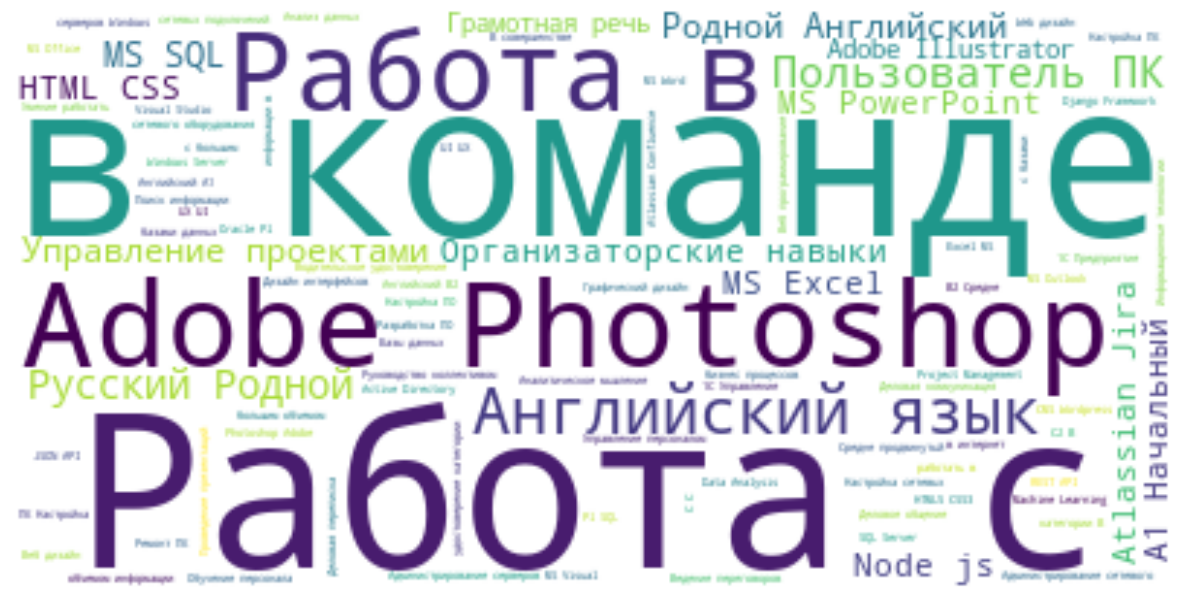

In [5]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator


skills = dataset["Tags"]

text = " ".join(" ".join(skill) for skill in skills if isinstance(skill, list))
print(text)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Мы видим, что есть довольно много навыков, которые важны при устройстве на работу, но вряд ли будут полезны в проектах, поэтому оставим только те списки, в которых есть хотя бы один из 10000 сформированных ранее тегов.

# Фильтрация данных

## Импортируем данные с 10 000 тегов

In [4]:
top_tags = pd.read_csv(r"..\dags\data\Top_tags.csv")["Skill"].to_list()

In [5]:
top_tags

['SQL',
 'Английский язык',
 'Git',
 'Python',
 'Linux',
 'Управление проектами',
 'Работа в команде',
 'JavaScript',
 'Java',
 'PostgreSQL',
 'Грамотная речь',
 'Atlassian Jira',
 'MS SQL',
 'ООП',
 'HTML',
 'Docker',
 'MS PowerPoint',
 'MySQL',
 'Аналитическое мышление',
 'PHP',
 'C#',
 'Ведение переговоров',
 'Деловая коммуникация',
 'CSS',
 'Adobe Photoshop',
 'Бизнес-анализ',
 'Пользователь ПК',
 '1С программирование',
 'C++',
 'Деловая переписка',
 'Разработка технических заданий',
 'Работа с большим объемом информации',
 'BPMN',
 'Spring Framework',
 'Грамотность',
 'Деловое общение',
 '1С: Предприятие 8',
 'REST',
 'Тестирование',
 'Scrum',
 'Организаторские навыки',
 'Agile Project Management',
 'UML',
 'React',
 'XML',
 'Atlassian Confluence',
 'Креативность',
 'Информационные технологии',
 'MS Visio',
 'Android',
 'Анализ данных',
 'TypeScript',
 'iOS',
 'Bash',
 'Системный анализ',
 'Kubernetes',
 'HTML5',
 'CRM',
 'Активные продажи',
 'Проведение презентаций',
 'Обучение и

## Удаление ненужных тегов

In [8]:
dataset["Tags"] = dataset["Tags"].apply(lambda x: [element for element in x if element in top_tags])

In [9]:
dataset

,Profession,Tags
0,Администратор базы данных,[]
1,Администратор базы данных,[Английский — A1 — Начальный]
2,Администратор базы данных,"[Деловая переписка, Информационные технологии,..."
3,Администратор базы данных,[Английский — A1 — Начальный]
4,Администратор базы данных,[]
...,...,...
24986,Веб-маркетолог,"[Маркетинговая стратегия, Project management, ..."
24987,Веб-маркетолог,"[Google AdWords, Google Analytics, Adobe Photo..."
24988,Веб-маркетолог,[Обучаемость]
24989,Веб-маркетолог,"[Продвижение сайтов, Составление семантическог..."


In [10]:
def has_matching_tag(tags, top_tags):
    return any(tag in top_tags for tag in tags)

# Применяем фильтрацию
dataset = dataset[dataset['Tags'].apply(lambda x: has_matching_tag(x, top_tags))]

In [11]:
dataset

,Profession,Tags
1,Администратор базы данных,[Английский — A1 — Начальный]
2,Администратор базы данных,"[Деловая переписка, Информационные технологии,..."
3,Администратор базы данных,[Английский — A1 — Начальный]
7,Администратор базы данных,[Креативность]
9,Администратор базы данных,[Английский — B2 — Средне-продвинутый]
...,...,...
24986,Веб-маркетолог,"[Маркетинговая стратегия, Project management, ..."
24987,Веб-маркетолог,"[Google AdWords, Google Analytics, Adobe Photo..."
24988,Веб-маркетолог,[Обучаемость]
24989,Веб-маркетолог,"[Продвижение сайтов, Составление семантическог..."


# Реализация fp-growth

In [12]:
skills = dataset["Tags"].to_list()

In [13]:
from mlxtend.preprocessing import TransactionEncoder


te = TransactionEncoder()
te_ary = te.fit(skills).transform(skills)
skills = pd.DataFrame(te_ary, columns=te.columns_)

In [14]:
skills

,*nix,.NET,.NET Core,.NET Framework,.Net,.Net Core,.net,.net Core,.net core,1 С,...,управление требованиями,управляемые формы,финансовые рынки,франчайзинг,хостинг,хранилище данных,честность,чтение чертежей,электроника,"эффективно управлять временем и людьми, находящимися в подчинении"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22602,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22603,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
from mlxtend.frequent_patterns import fpgrowth


res=fpgrowth(skills, min_support=0.005, use_colnames=True)

res

,support,itemsets
0,0.046359,(Английский — A1 — Начальный)
1,0.050119,(Деловая переписка)
2,0.024020,(Информационные технологии)
3,0.012961,(Cистемы управления базами данных)
4,0.005220,(Автоматизация)
...,...,...
15878,0.005220,"(MVVM, Retrofit)"
15879,0.005706,"(Kotlin, Git, Retrofit)"
15880,0.005706,"(Kotlin, Retrofit, Java)"
15881,0.005043,"(Git, Retrofit, Java)"


## Получение подходящих тегов

In [16]:
from mlxtend.frequent_patterns import association_rules


def get_similar_tags(user_tags: list, res, max_len, len_rules):
    rules = association_rules(res, metric="lift", min_threshold=1)

    user_rules = rules[rules['antecedents'].apply(lambda x: set(x).issuperset(user_tags))]

    similar_tags = set()

    top_rules = user_rules.nlargest(len_rules, 'lift')

    for rule in top_rules.itertuples():
        similar_tags.update(rule.consequents)

    similar_tags = list(set([tag for tag in similar_tags if tag not in user_tags]))[:max_len]

    return similar_tags

In [17]:
user_tags = ["Python", "Pandas"]

In [18]:
print(get_similar_tags(user_tags, res, 20, 70))

['Git', 'Linux', 'PostgreSQL', 'Numpy', 'SQL']


# Получение тегов на основе коллаборативной фильтрации

## Конвертация пользовательских тегов в вектор

In [6]:
def get_user_vector(user_skills):
    user_vector = pd.DataFrame(columns=top_tags)
    
    user_skills_df = pd.DataFrame([[1 if skill in user_skills else 0 for skill in top_tags]], columns=top_tags)
    
    user_vector = pd.concat([user_vector, user_skills_df])
    
    return user_vector.to_numpy()

## Конвертация датасета с тегами в матрицу

In [30]:
user_skill_matrix = pd.DataFrame(columns=top_tags)

for index, row in dataset.iterrows():
    tags = row["Tags"]
    for tag in tags:
        if tag in top_tags:
            user_skill_matrix.loc[index, tag] = 1
    print(f"{index}/{len(dataset)}")

user_skill_matrix

1/22606
2/22606
3/22606
7/22606
9/22606
10/22606
11/22606
12/22606
13/22606
14/22606
16/22606
18/22606
22/22606
23/22606
24/22606
25/22606
26/22606
27/22606
28/22606
29/22606
30/22606
31/22606
33/22606
34/22606
36/22606
38/22606
40/22606
41/22606
43/22606
45/22606
46/22606
47/22606
48/22606
49/22606
50/22606
51/22606
52/22606
54/22606
55/22606
56/22606
58/22606
59/22606
60/22606
61/22606
62/22606
63/22606
64/22606
65/22606
67/22606
68/22606
70/22606
71/22606
72/22606
73/22606
75/22606
76/22606
78/22606
79/22606
82/22606
85/22606
88/22606
89/22606
91/22606
93/22606
94/22606
96/22606
99/22606
100/22606
104/22606
106/22606
107/22606
108/22606
109/22606
110/22606
111/22606
112/22606
113/22606
114/22606
115/22606
116/22606
117/22606
118/22606
123/22606
124/22606
125/22606
126/22606
128/22606
129/22606
130/22606
131/22606
132/22606
133/22606
135/22606
136/22606
137/22606
140/22606
141/22606
142/22606
143/22606
144/22606
147/22606
151/22606
152/22606
154/22606
155/22606
156/22606
157/22606
15

1060/22606
1061/22606
1062/22606
1063/22606
1064/22606
1065/22606
1066/22606
1067/22606
1068/22606
1069/22606
1070/22606
1071/22606
1073/22606
1075/22606
1076/22606
1077/22606
1078/22606
1080/22606
1081/22606
1082/22606
1084/22606
1085/22606
1086/22606
1087/22606
1088/22606
1089/22606
1090/22606
1091/22606
1092/22606
1093/22606
1094/22606
1095/22606
1096/22606
1097/22606
1098/22606
1099/22606
1100/22606
1101/22606
1102/22606
1103/22606
1104/22606
1105/22606
1106/22606
1107/22606
1108/22606
1109/22606
1110/22606
1112/22606
1113/22606
1114/22606
1115/22606
1116/22606
1117/22606
1118/22606
1119/22606
1120/22606
1122/22606
1123/22606
1124/22606
1125/22606
1128/22606
1130/22606
1131/22606
1133/22606
1134/22606
1135/22606
1136/22606
1137/22606
1138/22606
1139/22606
1140/22606
1141/22606
1142/22606
1143/22606
1144/22606
1145/22606
1146/22606
1147/22606
1148/22606
1149/22606
1150/22606
1151/22606
1152/22606
1153/22606
1154/22606
1155/22606
1156/22606
1157/22606
1158/22606
1159/22606
1162/22606

1916/22606
1917/22606
1918/22606
1919/22606
1920/22606
1921/22606
1922/22606
1923/22606
1924/22606
1925/22606
1927/22606
1928/22606
1929/22606
1930/22606
1931/22606
1932/22606
1933/22606
1935/22606
1936/22606
1937/22606
1938/22606
1939/22606
1940/22606
1941/22606
1942/22606
1943/22606
1945/22606
1946/22606
1947/22606
1948/22606
1949/22606
1950/22606
1951/22606
1952/22606
1953/22606
1954/22606
1955/22606
1956/22606
1957/22606
1958/22606
1959/22606
1960/22606
1961/22606
1962/22606
1963/22606
1964/22606
1965/22606
1966/22606
1967/22606
1968/22606
1969/22606
1971/22606
1972/22606
1973/22606
1974/22606
1976/22606
1977/22606
1978/22606
1980/22606
1981/22606
1984/22606
1985/22606
1988/22606
1989/22606
1990/22606
1991/22606
1993/22606
1994/22606
1995/22606
1996/22606
1997/22606
1998/22606
1999/22606
2000/22606
2001/22606
2002/22606
2004/22606
2005/22606
2006/22606
2008/22606
2010/22606
2011/22606
2012/22606
2013/22606
2014/22606
2015/22606
2016/22606
2017/22606
2018/22606
2020/22606
2022/22606

2778/22606
2779/22606
2780/22606
2781/22606
2782/22606
2783/22606
2784/22606
2785/22606
2786/22606
2788/22606
2789/22606
2791/22606
2792/22606
2794/22606
2795/22606
2796/22606
2797/22606
2798/22606
2799/22606
2800/22606
2801/22606
2802/22606
2803/22606
2804/22606
2805/22606
2806/22606
2807/22606
2808/22606
2809/22606
2810/22606
2811/22606
2812/22606
2813/22606
2814/22606
2815/22606
2816/22606
2818/22606
2819/22606
2820/22606
2822/22606
2823/22606
2824/22606
2825/22606
2826/22606
2827/22606
2829/22606
2830/22606
2831/22606
2832/22606
2833/22606
2834/22606
2835/22606
2836/22606
2837/22606
2838/22606
2840/22606
2841/22606
2842/22606
2844/22606
2845/22606
2846/22606
2847/22606
2848/22606
2850/22606
2852/22606
2853/22606
2854/22606
2855/22606
2856/22606
2857/22606
2858/22606
2859/22606
2860/22606
2861/22606
2862/22606
2863/22606
2864/22606
2865/22606
2866/22606
2867/22606
2868/22606
2869/22606
2870/22606
2871/22606
2872/22606
2873/22606
2874/22606
2875/22606
2877/22606
2878/22606
2879/22606

3632/22606
3633/22606
3634/22606
3635/22606
3637/22606
3638/22606
3639/22606
3640/22606
3641/22606
3642/22606
3643/22606
3646/22606
3647/22606
3648/22606
3649/22606
3651/22606
3652/22606
3653/22606
3654/22606
3655/22606
3656/22606
3657/22606
3658/22606
3659/22606
3660/22606
3662/22606
3663/22606
3664/22606
3665/22606
3667/22606
3668/22606
3669/22606
3670/22606
3671/22606
3673/22606
3675/22606
3676/22606
3677/22606
3678/22606
3679/22606
3680/22606
3681/22606
3683/22606
3684/22606
3686/22606
3687/22606
3688/22606
3689/22606
3690/22606
3691/22606
3692/22606
3693/22606
3694/22606
3695/22606
3696/22606
3697/22606
3698/22606
3702/22606
3705/22606
3706/22606
3707/22606
3708/22606
3709/22606
3712/22606
3714/22606
3715/22606
3717/22606
3718/22606
3719/22606
3720/22606
3722/22606
3724/22606
3725/22606
3726/22606
3727/22606
3728/22606
3729/22606
3730/22606
3731/22606
3733/22606
3734/22606
3735/22606
3736/22606
3737/22606
3738/22606
3739/22606
3741/22606
3743/22606
3744/22606
3746/22606
3747/22606

4558/22606
4560/22606
4562/22606
4563/22606
4564/22606
4565/22606
4566/22606
4567/22606
4568/22606
4569/22606
4570/22606
4571/22606
4572/22606
4573/22606
4574/22606
4575/22606
4576/22606
4579/22606
4580/22606
4581/22606
4582/22606
4583/22606
4584/22606
4585/22606
4586/22606
4587/22606
4589/22606
4590/22606
4591/22606
4592/22606
4593/22606
4595/22606
4596/22606
4597/22606
4598/22606
4599/22606
4601/22606
4602/22606
4603/22606
4605/22606
4606/22606
4607/22606
4609/22606
4610/22606
4611/22606
4612/22606
4613/22606
4614/22606
4616/22606
4617/22606
4618/22606
4619/22606
4620/22606
4621/22606
4622/22606
4623/22606
4624/22606
4625/22606
4626/22606
4627/22606
4628/22606
4629/22606
4630/22606
4631/22606
4633/22606
4634/22606
4635/22606
4636/22606
4637/22606
4638/22606
4639/22606
4640/22606
4641/22606
4643/22606
4644/22606
4645/22606
4646/22606
4647/22606
4648/22606
4649/22606
4650/22606
4651/22606
4652/22606
4653/22606
4654/22606
4655/22606
4656/22606
4657/22606
4658/22606
4659/22606
4660/22606

5353/22606
5354/22606
5355/22606
5357/22606
5358/22606
5359/22606
5360/22606
5361/22606
5362/22606
5364/22606
5365/22606
5366/22606
5367/22606
5368/22606
5369/22606
5370/22606
5371/22606
5372/22606
5373/22606
5374/22606
5375/22606
5376/22606
5377/22606
5378/22606
5379/22606
5380/22606
5381/22606
5382/22606
5383/22606
5384/22606
5385/22606
5386/22606
5387/22606
5388/22606
5389/22606
5390/22606
5391/22606
5392/22606
5393/22606
5394/22606
5395/22606
5396/22606
5397/22606
5398/22606
5399/22606
5400/22606
5401/22606
5402/22606
5403/22606
5404/22606
5405/22606
5406/22606
5407/22606
5408/22606
5409/22606
5410/22606
5411/22606
5412/22606
5413/22606
5414/22606
5415/22606
5416/22606
5417/22606
5418/22606
5419/22606
5420/22606
5421/22606
5422/22606
5423/22606
5424/22606
5425/22606
5426/22606
5428/22606
5429/22606
5430/22606
5431/22606
5432/22606
5433/22606
5434/22606
5435/22606
5436/22606
5437/22606
5438/22606
5439/22606
5440/22606
5441/22606
5442/22606
5443/22606
5444/22606
5445/22606
5446/22606

6119/22606
6120/22606
6123/22606
6124/22606
6125/22606
6126/22606
6127/22606
6128/22606
6129/22606
6130/22606
6131/22606
6132/22606
6133/22606
6134/22606
6135/22606
6136/22606
6137/22606
6138/22606
6139/22606
6140/22606
6141/22606
6142/22606
6143/22606
6144/22606
6145/22606
6146/22606
6147/22606
6148/22606
6149/22606
6150/22606
6151/22606
6152/22606
6153/22606
6154/22606
6156/22606
6157/22606
6158/22606
6159/22606
6160/22606
6161/22606
6162/22606
6163/22606
6164/22606
6165/22606
6166/22606
6167/22606
6169/22606
6170/22606
6171/22606
6172/22606
6173/22606
6174/22606
6175/22606
6176/22606
6177/22606
6179/22606
6180/22606
6181/22606
6182/22606
6183/22606
6184/22606
6185/22606
6186/22606
6188/22606
6189/22606
6190/22606
6192/22606
6193/22606
6194/22606
6195/22606
6196/22606
6198/22606
6199/22606
6200/22606
6201/22606
6202/22606
6203/22606
6205/22606
6207/22606
6208/22606
6209/22606
6210/22606
6211/22606
6212/22606
6213/22606
6214/22606
6215/22606
6216/22606
6217/22606
6218/22606
6219/22606

6943/22606
6944/22606
6945/22606
6946/22606
6947/22606
6948/22606
6949/22606
6950/22606
6951/22606
6952/22606
6953/22606
6954/22606
6955/22606
6957/22606
6958/22606
6959/22606
6960/22606
6961/22606
6962/22606
6963/22606
6964/22606
6965/22606
6967/22606
6968/22606
6969/22606
6970/22606
6971/22606
6972/22606
6973/22606
6974/22606
6977/22606
6978/22606
6979/22606
6980/22606
6981/22606
6982/22606
6983/22606
6984/22606
6985/22606
6986/22606
6987/22606
6988/22606
6989/22606
6990/22606
6991/22606
6992/22606
6993/22606
6994/22606
6995/22606
6996/22606
6997/22606
6998/22606
6999/22606
7001/22606
7002/22606
7004/22606
7005/22606
7007/22606
7010/22606
7012/22606
7014/22606
7015/22606
7018/22606
7021/22606
7023/22606
7025/22606
7026/22606
7027/22606
7028/22606
7029/22606
7030/22606
7032/22606
7034/22606
7035/22606
7036/22606
7038/22606
7039/22606
7040/22606
7041/22606
7042/22606
7044/22606
7046/22606
7049/22606
7050/22606
7051/22606
7052/22606
7053/22606
7054/22606
7055/22606
7056/22606
7057/22606

7841/22606
7843/22606
7844/22606
7845/22606
7846/22606
7847/22606
7849/22606
7850/22606
7851/22606
7852/22606
7853/22606
7854/22606
7855/22606
7856/22606
7857/22606
7858/22606
7859/22606
7860/22606
7861/22606
7862/22606
7863/22606
7864/22606
7865/22606
7866/22606
7867/22606
7868/22606
7869/22606
7870/22606
7871/22606
7873/22606
7874/22606
7875/22606
7876/22606
7877/22606
7878/22606
7881/22606
7882/22606
7883/22606
7884/22606
7885/22606
7886/22606
7887/22606
7888/22606
7889/22606
7890/22606
7891/22606
7893/22606
7894/22606
7895/22606
7896/22606
7897/22606
7898/22606
7900/22606
7901/22606
7902/22606
7903/22606
7905/22606
7906/22606
7907/22606
7909/22606
7910/22606
7912/22606
7913/22606
7914/22606
7916/22606
7919/22606
7921/22606
7922/22606
7923/22606
7924/22606
7925/22606
7927/22606
7929/22606
7930/22606
7931/22606
7933/22606
7934/22606
7935/22606
7936/22606
7937/22606
7938/22606
7939/22606
7944/22606
7948/22606
7949/22606
7950/22606
7951/22606
7952/22606
7953/22606
7954/22606
7955/22606

8675/22606
8676/22606
8677/22606
8678/22606
8679/22606
8680/22606
8681/22606
8682/22606
8683/22606
8684/22606
8685/22606
8686/22606
8687/22606
8688/22606
8689/22606
8690/22606
8691/22606
8692/22606
8693/22606
8694/22606
8695/22606
8696/22606
8697/22606
8698/22606
8699/22606
8700/22606
8701/22606
8702/22606
8703/22606
8704/22606
8705/22606
8706/22606
8707/22606
8708/22606
8709/22606
8710/22606
8711/22606
8712/22606
8713/22606
8714/22606
8715/22606
8716/22606
8718/22606
8719/22606
8720/22606
8721/22606
8722/22606
8723/22606
8724/22606
8725/22606
8726/22606
8727/22606
8728/22606
8729/22606
8730/22606
8731/22606
8732/22606
8733/22606
8734/22606
8735/22606
8736/22606
8737/22606
8738/22606
8739/22606
8740/22606
8741/22606
8742/22606
8743/22606
8744/22606
8745/22606
8746/22606
8747/22606
8748/22606
8749/22606
8750/22606
8751/22606
8752/22606
8753/22606
8754/22606
8755/22606
8757/22606
8758/22606
8759/22606
8760/22606
8761/22606
8762/22606
8763/22606
8764/22606
8765/22606
8766/22606
8767/22606

9507/22606
9508/22606
9510/22606
9511/22606
9513/22606
9514/22606
9515/22606
9516/22606
9517/22606
9518/22606
9519/22606
9520/22606
9521/22606
9522/22606
9523/22606
9524/22606
9525/22606
9527/22606
9528/22606
9529/22606
9530/22606
9531/22606
9532/22606
9533/22606
9536/22606
9537/22606
9539/22606
9540/22606
9542/22606
9543/22606
9544/22606
9545/22606
9546/22606
9547/22606
9548/22606
9549/22606
9550/22606
9551/22606
9553/22606
9555/22606
9558/22606
9559/22606
9560/22606
9561/22606
9562/22606
9563/22606
9564/22606
9565/22606
9566/22606
9567/22606
9568/22606
9569/22606
9570/22606
9571/22606
9572/22606
9573/22606
9574/22606
9575/22606
9577/22606
9579/22606
9581/22606
9582/22606
9584/22606
9585/22606
9586/22606
9587/22606
9588/22606
9589/22606
9590/22606
9591/22606
9592/22606
9593/22606
9594/22606
9596/22606
9597/22606
9598/22606
9599/22606
9600/22606
9601/22606
9603/22606
9604/22606
9606/22606
9607/22606
9608/22606
9610/22606
9611/22606
9612/22606
9614/22606
9615/22606
9619/22606
9620/22606

10362/22606
10364/22606
10365/22606
10366/22606
10367/22606
10368/22606
10369/22606
10370/22606
10371/22606
10372/22606
10373/22606
10374/22606
10375/22606
10376/22606
10377/22606
10379/22606
10380/22606
10381/22606
10382/22606
10383/22606
10384/22606
10385/22606
10386/22606
10387/22606
10388/22606
10389/22606
10390/22606
10391/22606
10392/22606
10393/22606
10394/22606
10395/22606
10396/22606
10397/22606
10398/22606
10399/22606
10400/22606
10402/22606
10403/22606
10404/22606
10405/22606
10406/22606
10407/22606
10408/22606
10409/22606
10410/22606
10411/22606
10412/22606
10414/22606
10415/22606
10416/22606
10417/22606
10418/22606
10419/22606
10420/22606
10421/22606
10422/22606
10423/22606
10424/22606
10425/22606
10426/22606
10427/22606
10428/22606
10429/22606
10430/22606
10432/22606
10433/22606
10434/22606
10435/22606
10436/22606
10437/22606
10438/22606
10439/22606
10440/22606
10441/22606
10442/22606
10443/22606
10444/22606
10445/22606
10446/22606
10447/22606
10448/22606
10449/22606
1045

11085/22606
11086/22606
11087/22606
11088/22606
11089/22606
11090/22606
11091/22606
11092/22606
11093/22606
11094/22606
11096/22606
11097/22606
11098/22606
11099/22606
11100/22606
11101/22606
11102/22606
11103/22606
11104/22606
11105/22606
11106/22606
11107/22606
11108/22606
11109/22606
11110/22606
11111/22606
11113/22606
11114/22606
11115/22606
11116/22606
11117/22606
11118/22606
11119/22606
11120/22606
11121/22606
11122/22606
11123/22606
11124/22606
11125/22606
11126/22606
11127/22606
11128/22606
11129/22606
11130/22606
11131/22606
11132/22606
11133/22606
11134/22606
11135/22606
11136/22606
11137/22606
11138/22606
11139/22606
11140/22606
11141/22606
11142/22606
11143/22606
11144/22606
11145/22606
11146/22606
11147/22606
11150/22606
11151/22606
11152/22606
11153/22606
11154/22606
11155/22606
11156/22606
11157/22606
11158/22606
11159/22606
11160/22606
11161/22606
11162/22606
11163/22606
11164/22606
11165/22606
11166/22606
11167/22606
11168/22606
11169/22606
11170/22606
11171/22606
1117

11828/22606
11830/22606
11831/22606
11832/22606
11833/22606
11834/22606
11835/22606
11836/22606
11837/22606
11838/22606
11839/22606
11840/22606
11841/22606
11842/22606
11843/22606
11844/22606
11845/22606
11846/22606
11847/22606
11848/22606
11849/22606
11850/22606
11851/22606
11852/22606
11853/22606
11854/22606
11855/22606
11856/22606
11857/22606
11858/22606
11859/22606
11860/22606
11861/22606
11862/22606
11863/22606
11864/22606
11865/22606
11866/22606
11867/22606
11868/22606
11869/22606
11870/22606
11871/22606
11872/22606
11873/22606
11874/22606
11875/22606
11876/22606
11877/22606
11878/22606
11879/22606
11880/22606
11881/22606
11882/22606
11883/22606
11884/22606
11885/22606
11886/22606
11887/22606
11889/22606
11890/22606
11891/22606
11892/22606
11893/22606
11894/22606
11895/22606
11896/22606
11897/22606
11898/22606
11899/22606
11900/22606
11901/22606
11902/22606
11903/22606
11904/22606
11905/22606
11906/22606
11907/22606
11908/22606
11909/22606
11910/22606
11911/22606
11912/22606
1191

12551/22606
12552/22606
12553/22606
12554/22606
12555/22606
12556/22606
12557/22606
12558/22606
12559/22606
12560/22606
12561/22606
12562/22606
12563/22606
12564/22606
12565/22606
12566/22606
12567/22606
12568/22606
12569/22606
12570/22606
12571/22606
12572/22606
12573/22606
12574/22606
12575/22606
12576/22606
12577/22606
12578/22606
12579/22606
12580/22606
12582/22606
12584/22606
12585/22606
12586/22606
12587/22606
12588/22606
12589/22606
12590/22606
12591/22606
12592/22606
12593/22606
12594/22606
12595/22606
12596/22606
12597/22606
12598/22606
12599/22606
12600/22606
12601/22606
12602/22606
12603/22606
12604/22606
12605/22606
12606/22606
12607/22606
12608/22606
12609/22606
12610/22606
12611/22606
12612/22606
12614/22606
12615/22606
12616/22606
12617/22606
12618/22606
12619/22606
12620/22606
12621/22606
12622/22606
12623/22606
12624/22606
12625/22606
12626/22606
12627/22606
12628/22606
12629/22606
12630/22606
12631/22606
12632/22606
12633/22606
12634/22606
12635/22606
12637/22606
1263

13361/22606
13362/22606
13363/22606
13364/22606
13365/22606
13366/22606
13367/22606
13368/22606
13369/22606
13370/22606
13371/22606
13373/22606
13374/22606
13375/22606
13376/22606
13377/22606
13378/22606
13379/22606
13380/22606
13381/22606
13382/22606
13384/22606
13385/22606
13386/22606
13387/22606
13388/22606
13389/22606
13390/22606
13391/22606
13393/22606
13394/22606
13395/22606
13396/22606
13397/22606
13398/22606
13399/22606
13400/22606
13401/22606
13402/22606
13403/22606
13404/22606
13405/22606
13406/22606
13407/22606
13408/22606
13409/22606
13410/22606
13411/22606
13412/22606
13413/22606
13415/22606
13416/22606
13418/22606
13419/22606
13420/22606
13421/22606
13422/22606
13423/22606
13424/22606
13425/22606
13426/22606
13427/22606
13428/22606
13429/22606
13430/22606
13431/22606
13432/22606
13433/22606
13434/22606
13435/22606
13436/22606
13437/22606
13438/22606
13439/22606
13440/22606
13441/22606
13442/22606
13443/22606
13444/22606
13445/22606
13446/22606
13447/22606
13448/22606
1344

14073/22606
14074/22606
14075/22606
14076/22606
14077/22606
14078/22606
14079/22606
14080/22606
14081/22606
14082/22606
14083/22606
14084/22606
14085/22606
14086/22606
14087/22606
14089/22606
14090/22606
14091/22606
14092/22606
14093/22606
14094/22606
14096/22606
14097/22606
14098/22606
14099/22606
14100/22606
14101/22606
14102/22606
14103/22606
14104/22606
14105/22606
14106/22606
14107/22606
14108/22606
14109/22606
14110/22606
14111/22606
14112/22606
14113/22606
14114/22606
14115/22606
14116/22606
14117/22606
14118/22606
14119/22606
14120/22606
14121/22606
14123/22606
14124/22606
14125/22606
14126/22606
14127/22606
14128/22606
14129/22606
14130/22606
14131/22606
14132/22606
14133/22606
14134/22606
14135/22606
14136/22606
14137/22606
14138/22606
14139/22606
14140/22606
14141/22606
14143/22606
14144/22606
14145/22606
14146/22606
14147/22606
14148/22606
14149/22606
14150/22606
14151/22606
14152/22606
14153/22606
14154/22606
14155/22606
14156/22606
14157/22606
14159/22606
14160/22606
1416

14838/22606
14839/22606
14840/22606
14842/22606
14845/22606
14846/22606
14847/22606
14848/22606
14849/22606
14850/22606
14851/22606
14852/22606
14853/22606
14854/22606
14855/22606
14856/22606
14857/22606
14858/22606
14859/22606
14861/22606
14862/22606
14863/22606
14864/22606
14865/22606
14866/22606
14868/22606
14869/22606
14870/22606
14871/22606
14872/22606
14874/22606
14875/22606
14876/22606
14877/22606
14880/22606
14881/22606
14882/22606
14884/22606
14886/22606
14887/22606
14889/22606
14890/22606
14892/22606
14893/22606
14895/22606
14897/22606
14898/22606
14899/22606
14901/22606
14902/22606
14903/22606
14904/22606
14905/22606
14906/22606
14907/22606
14908/22606
14910/22606
14911/22606
14913/22606
14914/22606
14915/22606
14916/22606
14917/22606
14918/22606
14919/22606
14920/22606
14922/22606
14923/22606
14924/22606
14925/22606
14926/22606
14927/22606
14928/22606
14929/22606
14930/22606
14932/22606
14934/22606
14935/22606
14936/22606
14937/22606
14938/22606
14939/22606
14940/22606
1494

15593/22606
15594/22606
15595/22606
15596/22606
15597/22606
15598/22606
15599/22606
15600/22606
15601/22606
15602/22606
15603/22606
15604/22606
15605/22606
15606/22606
15607/22606
15608/22606
15609/22606
15610/22606
15611/22606
15612/22606
15614/22606
15615/22606
15616/22606
15617/22606
15618/22606
15619/22606
15620/22606
15621/22606
15622/22606
15623/22606
15624/22606
15625/22606
15626/22606
15627/22606
15628/22606
15629/22606
15630/22606
15631/22606
15632/22606
15633/22606
15634/22606
15635/22606
15636/22606
15637/22606
15638/22606
15639/22606
15640/22606
15641/22606
15642/22606
15643/22606
15644/22606
15645/22606
15646/22606
15647/22606
15648/22606
15649/22606
15650/22606
15651/22606
15652/22606
15653/22606
15654/22606
15655/22606
15656/22606
15657/22606
15658/22606
15659/22606
15660/22606
15661/22606
15662/22606
15663/22606
15664/22606
15665/22606
15666/22606
15667/22606
15668/22606
15669/22606
15670/22606
15671/22606
15672/22606
15673/22606
15674/22606
15676/22606
15677/22606
1567

16315/22606
16316/22606
16317/22606
16318/22606
16319/22606
16320/22606
16321/22606
16322/22606
16324/22606
16326/22606
16327/22606
16328/22606
16329/22606
16330/22606
16331/22606
16332/22606
16333/22606
16334/22606
16335/22606
16336/22606
16337/22606
16338/22606
16340/22606
16341/22606
16342/22606
16343/22606
16344/22606
16346/22606
16347/22606
16348/22606
16350/22606
16351/22606
16352/22606
16353/22606
16354/22606
16355/22606
16356/22606
16357/22606
16358/22606
16359/22606
16360/22606
16361/22606
16362/22606
16364/22606
16366/22606
16367/22606
16368/22606
16369/22606
16370/22606
16371/22606
16372/22606
16373/22606
16374/22606
16375/22606
16376/22606
16377/22606
16378/22606
16379/22606
16380/22606
16381/22606
16382/22606
16383/22606
16384/22606
16385/22606
16386/22606
16387/22606
16388/22606
16390/22606
16391/22606
16392/22606
16393/22606
16394/22606
16395/22606
16397/22606
16398/22606
16399/22606
16400/22606
16401/22606
16402/22606
16403/22606
16404/22606
16405/22606
16406/22606
1640

17167/22606
17168/22606
17169/22606
17170/22606
17171/22606
17172/22606
17173/22606
17174/22606
17175/22606
17176/22606
17177/22606
17178/22606
17179/22606
17180/22606
17181/22606
17182/22606
17183/22606
17184/22606
17185/22606
17186/22606
17187/22606
17188/22606
17189/22606
17190/22606
17191/22606
17192/22606
17193/22606
17194/22606
17195/22606
17196/22606
17197/22606
17198/22606
17199/22606
17200/22606
17201/22606
17202/22606
17203/22606
17204/22606
17205/22606
17206/22606
17207/22606
17208/22606
17209/22606
17210/22606
17211/22606
17212/22606
17213/22606
17214/22606
17215/22606
17217/22606
17218/22606
17219/22606
17220/22606
17221/22606
17222/22606
17223/22606
17224/22606
17225/22606
17226/22606
17227/22606
17228/22606
17229/22606
17230/22606
17231/22606
17232/22606
17233/22606
17234/22606
17235/22606
17237/22606
17238/22606
17239/22606
17240/22606
17241/22606
17242/22606
17243/22606
17244/22606
17245/22606
17246/22606
17247/22606
17248/22606
17249/22606
17250/22606
17251/22606
1725

17880/22606
17881/22606
17882/22606
17883/22606
17884/22606
17885/22606
17886/22606
17887/22606
17888/22606
17889/22606
17890/22606
17891/22606
17892/22606
17893/22606
17894/22606
17895/22606
17896/22606
17899/22606
17900/22606
17901/22606
17902/22606
17903/22606
17904/22606
17905/22606
17906/22606
17907/22606
17908/22606
17909/22606
17910/22606
17911/22606
17913/22606
17914/22606
17915/22606
17916/22606
17917/22606
17918/22606
17919/22606
17920/22606
17921/22606
17922/22606
17925/22606
17926/22606
17927/22606
17928/22606
17929/22606
17930/22606
17931/22606
17932/22606
17933/22606
17934/22606
17935/22606
17936/22606
17937/22606
17938/22606
17939/22606
17940/22606
17941/22606
17942/22606
17943/22606
17944/22606
17945/22606
17946/22606
17947/22606
17948/22606
17949/22606
17950/22606
17951/22606
17952/22606
17953/22606
17954/22606
17955/22606
17956/22606
17957/22606
17958/22606
17959/22606
17960/22606
17961/22606
17962/22606
17963/22606
17964/22606
17965/22606
17966/22606
17967/22606
1796

18598/22606
18599/22606
18600/22606
18601/22606
18602/22606
18603/22606
18604/22606
18605/22606
18606/22606
18607/22606
18608/22606
18609/22606
18610/22606
18611/22606
18612/22606
18613/22606
18614/22606
18615/22606
18616/22606
18617/22606
18618/22606
18619/22606
18620/22606
18621/22606
18622/22606
18623/22606
18624/22606
18625/22606
18626/22606
18627/22606
18628/22606
18629/22606
18630/22606
18631/22606
18632/22606
18633/22606
18634/22606
18635/22606
18636/22606
18637/22606
18638/22606
18639/22606
18640/22606
18641/22606
18642/22606
18643/22606
18644/22606
18645/22606
18646/22606
18647/22606
18648/22606
18649/22606
18650/22606
18651/22606
18652/22606
18653/22606
18654/22606
18655/22606
18656/22606
18657/22606
18658/22606
18659/22606
18660/22606
18661/22606
18663/22606
18664/22606
18665/22606
18666/22606
18667/22606
18668/22606
18669/22606
18670/22606
18671/22606
18672/22606
18673/22606
18674/22606
18675/22606
18676/22606
18677/22606
18678/22606
18680/22606
18681/22606
18683/22606
1868

19311/22606
19312/22606
19313/22606
19314/22606
19315/22606
19316/22606
19317/22606
19318/22606
19319/22606
19320/22606
19321/22606
19322/22606
19324/22606
19325/22606
19326/22606
19327/22606
19328/22606
19329/22606
19330/22606
19331/22606
19332/22606
19333/22606
19334/22606
19335/22606
19336/22606
19337/22606
19338/22606
19339/22606
19340/22606
19341/22606
19342/22606
19343/22606
19344/22606
19345/22606
19346/22606
19347/22606
19348/22606
19349/22606
19350/22606
19351/22606
19352/22606
19353/22606
19354/22606
19355/22606
19356/22606
19357/22606
19358/22606
19359/22606
19360/22606
19361/22606
19362/22606
19363/22606
19364/22606
19365/22606
19366/22606
19367/22606
19368/22606
19369/22606
19370/22606
19371/22606
19372/22606
19373/22606
19374/22606
19375/22606
19376/22606
19377/22606
19378/22606
19379/22606
19380/22606
19381/22606
19382/22606
19383/22606
19384/22606
19385/22606
19386/22606
19387/22606
19388/22606
19389/22606
19390/22606
19391/22606
19392/22606
19393/22606
19394/22606
1939

20007/22606
20008/22606
20010/22606
20012/22606
20013/22606
20014/22606
20015/22606
20016/22606
20017/22606
20018/22606
20019/22606
20020/22606
20021/22606
20022/22606
20023/22606
20024/22606
20025/22606
20026/22606
20027/22606
20028/22606
20029/22606
20030/22606
20031/22606
20032/22606
20033/22606
20034/22606
20035/22606
20036/22606
20037/22606
20038/22606
20039/22606
20040/22606
20041/22606
20042/22606
20043/22606
20044/22606
20045/22606
20046/22606
20047/22606
20048/22606
20049/22606
20050/22606
20051/22606
20053/22606
20054/22606
20055/22606
20056/22606
20057/22606
20058/22606
20059/22606
20060/22606
20061/22606
20062/22606
20063/22606
20064/22606
20065/22606
20066/22606
20067/22606
20068/22606
20069/22606
20070/22606
20072/22606
20073/22606
20074/22606
20075/22606
20076/22606
20077/22606
20078/22606
20079/22606
20080/22606
20081/22606
20082/22606
20083/22606
20084/22606
20085/22606
20086/22606
20087/22606
20088/22606
20089/22606
20090/22606
20091/22606
20092/22606
20093/22606
2009

20719/22606
20720/22606
20722/22606
20723/22606
20724/22606
20725/22606
20726/22606
20727/22606
20728/22606
20729/22606
20730/22606
20731/22606
20732/22606
20733/22606
20734/22606
20735/22606
20737/22606
20738/22606
20739/22606
20740/22606
20741/22606
20742/22606
20743/22606
20744/22606
20745/22606
20746/22606
20747/22606
20748/22606
20749/22606
20750/22606
20752/22606
20753/22606
20755/22606
20756/22606
20757/22606
20758/22606
20759/22606
20761/22606
20762/22606
20763/22606
20764/22606
20765/22606
20766/22606
20767/22606
20768/22606
20769/22606
20770/22606
20771/22606
20773/22606
20774/22606
20775/22606
20776/22606
20777/22606
20778/22606
20779/22606
20780/22606
20782/22606
20783/22606
20784/22606
20785/22606
20786/22606
20787/22606
20788/22606
20789/22606
20790/22606
20792/22606
20793/22606
20794/22606
20796/22606
20797/22606
20798/22606
20799/22606
20800/22606
20801/22606
20802/22606
20803/22606
20805/22606
20806/22606
20807/22606
20808/22606
20809/22606
20810/22606
20811/22606
2081

21434/22606
21435/22606
21436/22606
21437/22606
21438/22606
21439/22606
21440/22606
21441/22606
21442/22606
21443/22606
21444/22606
21445/22606
21446/22606
21447/22606
21448/22606
21449/22606
21450/22606
21451/22606
21452/22606
21453/22606
21454/22606
21455/22606
21456/22606
21457/22606
21458/22606
21459/22606
21460/22606
21461/22606
21462/22606
21463/22606
21464/22606
21465/22606
21467/22606
21468/22606
21469/22606
21470/22606
21471/22606
21472/22606
21473/22606
21474/22606
21475/22606
21476/22606
21477/22606
21479/22606
21480/22606
21481/22606
21482/22606
21483/22606
21484/22606
21485/22606
21486/22606
21487/22606
21488/22606
21489/22606
21490/22606
21491/22606
21492/22606
21493/22606
21494/22606
21495/22606
21496/22606
21497/22606
21498/22606
21499/22606
21500/22606
21501/22606
21502/22606
21503/22606
21505/22606
21506/22606
21507/22606
21508/22606
21509/22606
21510/22606
21511/22606
21512/22606
21513/22606
21514/22606
21515/22606
21516/22606
21517/22606
21518/22606
21519/22606
2152

22155/22606
22156/22606
22157/22606
22158/22606
22160/22606
22161/22606
22162/22606
22163/22606
22164/22606
22165/22606
22166/22606
22167/22606
22168/22606
22169/22606
22170/22606
22171/22606
22172/22606
22174/22606
22175/22606
22176/22606
22177/22606
22178/22606
22179/22606
22180/22606
22181/22606
22182/22606
22183/22606
22184/22606
22185/22606
22186/22606
22187/22606
22188/22606
22190/22606
22191/22606
22192/22606
22193/22606
22194/22606
22195/22606
22197/22606
22198/22606
22199/22606
22200/22606
22201/22606
22202/22606
22203/22606
22204/22606
22205/22606
22206/22606
22207/22606
22208/22606
22209/22606
22210/22606
22211/22606
22212/22606
22213/22606
22214/22606
22215/22606
22216/22606
22217/22606
22218/22606
22219/22606
22220/22606
22221/22606
22222/22606
22223/22606
22224/22606
22225/22606
22226/22606
22227/22606
22228/22606
22229/22606
22230/22606
22231/22606
22232/22606
22233/22606
22235/22606
22236/22606
22237/22606
22238/22606
22239/22606
22240/22606
22241/22606
22242/22606
2224

22859/22606
22860/22606
22861/22606
22862/22606
22863/22606
22864/22606
22865/22606
22866/22606
22867/22606
22868/22606
22869/22606
22870/22606
22871/22606
22872/22606
22873/22606
22874/22606
22875/22606
22876/22606
22877/22606
22878/22606
22879/22606
22880/22606
22881/22606
22882/22606
22883/22606
22884/22606
22885/22606
22886/22606
22888/22606
22889/22606
22890/22606
22891/22606
22892/22606
22893/22606
22894/22606
22895/22606
22896/22606
22897/22606
22898/22606
22899/22606
22900/22606
22901/22606
22902/22606
22903/22606
22904/22606
22905/22606
22906/22606
22907/22606
22908/22606
22909/22606
22910/22606
22911/22606
22912/22606
22913/22606
22914/22606
22915/22606
22916/22606
22917/22606
22918/22606
22919/22606
22920/22606
22921/22606
22922/22606
22924/22606
22925/22606
22926/22606
22927/22606
22928/22606
22929/22606
22930/22606
22932/22606
22933/22606
22934/22606
22935/22606
22936/22606
22937/22606
22938/22606
22939/22606
22940/22606
22941/22606
22942/22606
22943/22606
22944/22606
2294

23561/22606
23562/22606
23563/22606
23564/22606
23565/22606
23566/22606
23567/22606
23568/22606
23569/22606
23570/22606
23571/22606
23572/22606
23573/22606
23574/22606
23575/22606
23577/22606
23578/22606
23579/22606
23580/22606
23581/22606
23582/22606
23583/22606
23584/22606
23585/22606
23586/22606
23587/22606
23588/22606
23589/22606
23590/22606
23591/22606
23592/22606
23593/22606
23594/22606
23595/22606
23596/22606
23597/22606
23598/22606
23599/22606
23600/22606
23601/22606
23602/22606
23603/22606
23604/22606
23605/22606
23606/22606
23607/22606
23608/22606
23609/22606
23610/22606
23611/22606
23612/22606
23613/22606
23614/22606
23615/22606
23616/22606
23617/22606
23618/22606
23619/22606
23620/22606
23621/22606
23622/22606
23623/22606
23624/22606
23625/22606
23626/22606
23627/22606
23628/22606
23629/22606
23630/22606
23631/22606
23632/22606
23633/22606
23635/22606
23636/22606
23637/22606
23638/22606
23639/22606
23640/22606
23641/22606
23642/22606
23644/22606
23645/22606
23646/22606
2364

24312/22606
24313/22606
24314/22606
24315/22606
24316/22606
24317/22606
24319/22606
24320/22606
24322/22606
24323/22606
24324/22606
24325/22606
24326/22606
24327/22606
24328/22606
24329/22606
24330/22606
24331/22606
24332/22606
24333/22606
24334/22606
24335/22606
24336/22606
24337/22606
24338/22606
24339/22606
24340/22606
24342/22606
24343/22606
24344/22606
24345/22606
24346/22606
24347/22606
24349/22606
24350/22606
24351/22606
24352/22606
24353/22606
24354/22606
24355/22606
24356/22606
24357/22606
24358/22606
24359/22606
24360/22606
24361/22606
24362/22606
24363/22606
24364/22606
24366/22606
24367/22606
24368/22606
24369/22606
24370/22606
24371/22606
24372/22606
24375/22606
24376/22606
24377/22606
24378/22606
24379/22606
24380/22606
24381/22606
24382/22606
24383/22606
24384/22606
24385/22606
24387/22606
24389/22606
24390/22606
24391/22606
24392/22606
24393/22606
24394/22606
24395/22606
24396/22606
24397/22606
24398/22606
24399/22606
24400/22606
24401/22606
24402/22606
24403/22606
2440

,SQL,Английский язык,Git,Python,Linux,Управление проектами,Работа в команде,JavaScript,Java,PostgreSQL,...,ViewController,Realm/Core Data,английский технический,Бифит,функциональные спецификации,IDEF0+,security operation center,redteam,Office equipment,Diasoft FA#
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24989,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
user_skill_matrix.fillna(0,inplace=True)

user_skill_matrix.to_csv(r"..\data\Skill_matrix.csv")

In [86]:
user_skill_matrix.reset_index(drop= True , inplace= True )

user_skill_matrix

,SQL,Английский язык,Git,Python,Linux,Управление проектами,Работа в команде,JavaScript,Java,PostgreSQL,...,ViewController,Realm/Core Data,английский технический,Бифит,функциональные спецификации,IDEF0+,security operation center,redteam,Office equipment,Diasoft FA#
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22602,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22604,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
user_skill_matrix.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

## Высчитывание частотности тегов

In [36]:
tag_frequencies = user_skill_matrix.sum().to_list()

tag_frequencies

[4278,
 2851,
 6009,
 3544,
 3275,
 2012,
 2812,
 3987,
 2121,
 2829,
 1391,
 1446,
 1126,
 2437,
 3534,
 1756,
 1455,
 3191,
 753,
 2070,
 1547,
 1308,
 546,
 3267,
 3504,
 426,
 2124,
 483,
 1327,
 1133,
 477,
 1142,
 358,
 443,
 443,
 866,
 642,
 1085,
 500,
 710,
 1558,
 473,
 359,
 912,
 906,
 523,
 626,
 543,
 328,
 871,
 651,
 757,
 697,
 543,
 265,
 296,
 2487,
 321,
 226,
 562,
 334,
 277,
 1383,
 129,
 412,
 576,
 761,
 476,
 409,
 995,
 350,
 294,
 344,
 396,
 339,
 8,
 720,
 1970,
 741,
 652,
 1283,
 726,
 168,
 1531,
 400,
 248,
 259,
 652,
 171,
 370,
 289,
 156,
 701,
 216,
 290,
 212,
 404,
 2,
 259,
 426,
 258,
 400,
 577,
 1762,
 198,
 284,
 420,
 1362,
 91,
 274,
 507,
 219,
 933,
 455,
 543,
 482,
 760,
 184,
 229,
 415,
 246,
 453,
 272,
 147,
 541,
 953,
 505,
 113,
 196,
 729,
 657,
 74,
 190,
 206,
 805,
 586,
 397,
 401,
 125,
 284,
 335,
 470,
 651,
 297,
 353,
 305,
 202,
 298,
 413,
 582,
 265,
 158,
 291,
 196,
 769,
 313,
 313,
 139,
 169,
 602,
 160,
 491

## Реализация коллаборативной фильрации

In [91]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Создание взвешенной матрицы
def get_prepared_data(user_skill_matrix, tag_frequencies):
    skill_matrix = user_skill_matrix.to_numpy()
    
    max_frequency = max(tag_frequencies)
    normalized_tag_frequencies = np.array(tag_frequencies) / max_frequency
    
    weighted_user_skill_matrix = skill_matrix * normalized_tag_frequencies
    
    return (weighted_user_skill_matrix, normalized_tag_frequencies)


# Обучение модели
def get_model(weighted_user_skill_matrix):
    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(weighted_user_skill_matrix)
    
    return model


# Получение тегов
def get_tags_by_cosine(user_skills, skill_matrix, normalized_tag_frequencies, model, n_skills):

    user_skills_vector = get_user_vector(user_skills) * normalized_tag_frequencies
    
    # Нахождение ближайших соседей к выбранным навыкам
    distances, indices = model.kneighbors(user_skills_vector, n_neighbors=100)
    
    non_zero_indices = indices[0][distances[0] != 0]

    # Получение индексов
    recommended_skills_indexes = [skill_matrix[i].nonzero()[0].tolist() for i in non_zero_indices]
    
    # Получение списка с тегами
    recommended_skills = []
    
    for recommended_user_skills_indexes in recommended_skills_indexes:
        for index in recommended_user_skills_indexes:
            tag = top_tags[index]
            weight = normalized_tag_frequencies[index]
            
            if tag not in user_skills:
                recommended_skills.append(tag)
    
    unique_recommended_skills = set(recommended_skills)
    
    # Взвешенные теги на основе частотности в наборе
    weighted_recommended_skills = map(
        lambda x: (x, recommended_skills.count(x)), unique_recommended_skills)
    
    sorted_recommended_skills = sorted(weighted_recommended_skills, key=lambda x: x[1], reverse=True)

    # Вывод рекомендуемых тегов
    return [tag for tag, _ in sorted_recommended_skills[:n_skills]]

In [109]:
print(get_tags_by_cosine(["Python", "Django"], user_skill_matrix, tag_frequencies))

['Data science', 'numpy', 'QGIS', 'Разработка компьютерных Игр', 'Теория вероятностей', 'Линейная алгебра', 'Математическое моделирование', 'Research And Development', 'PyTorch', 'deep learning', 'нейронные сети', 'R', 'seaborn', 'DSP', 'pandas', 'NLP', 'Deep learning', 'Machine learning', 'Spark', 'machine learning', 'pytorch', 'Computer vision', 'Научные исследования', 'SPSS', 'С', 'sklearn', 'OpenCV', 'Статистический анализ', 'Management']


# Тот же алгоритм, но на готовом датасете hh.ru

In [8]:
dataset2 = pd.DataFrame(pd.read_csv(r"../dags/data/IT_vacancies_full.csv")["Keys"].to_list(), columns=["Tags"])

In [9]:
dataset2

,Tags
0,"['Docker', 'Golang', 'Redis', 'Английский язык..."
1,"['Грамотность', 'Написание текстов', 'Грамотна..."
2,"['Клиентоориентированность', 'Ориентация на ре..."
3,"['Продвижение бренда', 'Креативность', 'Adobe ..."
4,"['UI', 'UX', 'gamedev', 'game design', 'проект..."
...,...
48559,"['Мобильность', 'Работа в команде', 'Системы о..."
48560,"['Windows 7', 'Windows 8', 'Windows 10', 'Unix..."
48561,"['Работа с большим объемом информации', 'Управ..."
48562,"['B2B Продажи', 'Ведение переговоров', 'CRM', ..."


In [133]:
dataset2["Tags"] = dataset2["Tags"].apply(lambda x: eval(x))

In [136]:
dataset2["Tags"] = dataset2["Tags"].apply(lambda x: [element for element in x if element in top_tags])

In [138]:
dataset2

,Tags
0,"[Docker, Golang, Redis, Английский язык, Kafka]"
1,"[Грамотность, Написание текстов, Грамотная реч..."
2,"[Клиентоориентированность, Ориентация на резул..."
3,"[Продвижение бренда, Креативность, Adobe Photo..."
4,"[UI, UX, gamedev, game design, проектирование ..."
...,...
48559,"[Мобильность, Работа в команде, Системы охранн..."
48560,"[Windows 7, Windows 8, Windows 10, Unix, Hardw..."
48561,"[Работа с большим объемом информации, Управлен..."
48562,"[B2B Продажи, Ведение переговоров, CRM, Подгот..."


In [139]:
user_skill_matrix2 = pd.DataFrame(columns=top_tags)

for index, row in dataset2.iterrows():
    tags = row["Tags"]
    for tag in tags:
        if tag in top_tags:
            user_skill_matrix2.loc[index, tag] = 1
    print(f"{index}/{len(dataset2)}")

user_skill_matrix2

0/48564
1/48564
2/48564
3/48564
4/48564
5/48564
6/48564
7/48564
8/48564
9/48564
10/48564
11/48564
12/48564
13/48564
14/48564
15/48564
16/48564
17/48564
18/48564
19/48564
20/48564
21/48564
22/48564
23/48564
24/48564
25/48564
26/48564
27/48564
28/48564
29/48564
30/48564
31/48564
32/48564
33/48564
34/48564
35/48564
36/48564
37/48564
38/48564
39/48564
40/48564
41/48564
42/48564
43/48564
44/48564
45/48564
46/48564
47/48564
48/48564
49/48564
50/48564
51/48564
52/48564
53/48564
54/48564
55/48564
56/48564
57/48564
58/48564
59/48564
60/48564
61/48564
62/48564
63/48564
64/48564
65/48564
66/48564
67/48564
68/48564
69/48564
70/48564
71/48564
72/48564
73/48564
74/48564
75/48564
76/48564
77/48564
78/48564
79/48564
80/48564
81/48564
82/48564
83/48564
84/48564
85/48564
86/48564
87/48564
88/48564
89/48564
90/48564
91/48564
92/48564
93/48564
94/48564
95/48564
96/48564
97/48564
98/48564
99/48564
100/48564
101/48564
102/48564
103/48564
104/48564
105/48564
106/48564
107/48564
108/48564
109/48564
110/48564


833/48564
834/48564
835/48564
836/48564
837/48564
838/48564
839/48564
840/48564
841/48564
842/48564
843/48564
844/48564
845/48564
846/48564
847/48564
848/48564
849/48564
850/48564
851/48564
852/48564
853/48564
854/48564
855/48564
856/48564
857/48564
858/48564
859/48564
860/48564
861/48564
862/48564
863/48564
864/48564
865/48564
866/48564
867/48564
868/48564
869/48564
870/48564
871/48564
872/48564
873/48564
874/48564
875/48564
876/48564
877/48564
878/48564
879/48564
880/48564
881/48564
882/48564
883/48564
884/48564
885/48564
886/48564
887/48564
888/48564
889/48564
890/48564
891/48564
892/48564
893/48564
894/48564
895/48564
896/48564
897/48564
898/48564
899/48564
900/48564
901/48564
902/48564
903/48564
904/48564
905/48564
906/48564
907/48564
908/48564
909/48564
910/48564
911/48564
912/48564
913/48564
914/48564
915/48564
916/48564
917/48564
918/48564
919/48564
920/48564
921/48564
922/48564
923/48564
924/48564
925/48564
926/48564
927/48564
928/48564
929/48564
930/48564
931/48564
932/48564


1594/48564
1595/48564
1596/48564
1597/48564
1598/48564
1599/48564
1600/48564
1601/48564
1602/48564
1603/48564
1604/48564
1605/48564
1606/48564
1607/48564
1608/48564
1609/48564
1610/48564
1611/48564
1612/48564
1613/48564
1614/48564
1615/48564
1616/48564
1617/48564
1618/48564
1619/48564
1620/48564
1621/48564
1622/48564
1623/48564
1624/48564
1625/48564
1626/48564
1627/48564
1628/48564
1629/48564
1630/48564
1631/48564
1632/48564
1633/48564
1634/48564
1635/48564
1636/48564
1637/48564
1638/48564
1639/48564
1640/48564
1641/48564
1642/48564
1643/48564
1644/48564
1645/48564
1646/48564
1647/48564
1648/48564
1649/48564
1650/48564
1651/48564
1652/48564
1653/48564
1654/48564
1655/48564
1656/48564
1657/48564
1658/48564
1659/48564
1660/48564
1661/48564
1662/48564
1663/48564
1664/48564
1665/48564
1666/48564
1667/48564
1668/48564
1669/48564
1670/48564
1671/48564
1672/48564
1673/48564
1674/48564
1675/48564
1676/48564
1677/48564
1678/48564
1679/48564
1680/48564
1681/48564
1682/48564
1683/48564
1684/48564

2340/48564
2341/48564
2342/48564
2343/48564
2344/48564
2345/48564
2346/48564
2347/48564
2348/48564
2349/48564
2350/48564
2351/48564
2352/48564
2353/48564
2354/48564
2355/48564
2356/48564
2357/48564
2358/48564
2359/48564
2360/48564
2361/48564
2362/48564
2363/48564
2364/48564
2365/48564
2366/48564
2367/48564
2368/48564
2369/48564
2370/48564
2371/48564
2372/48564
2373/48564
2374/48564
2375/48564
2376/48564
2377/48564
2378/48564
2379/48564
2380/48564
2381/48564
2382/48564
2383/48564
2384/48564
2385/48564
2386/48564
2387/48564
2388/48564
2389/48564
2390/48564
2391/48564
2392/48564
2393/48564
2394/48564
2395/48564
2396/48564
2397/48564
2398/48564
2399/48564
2400/48564
2401/48564
2402/48564
2403/48564
2404/48564
2405/48564
2406/48564
2407/48564
2408/48564
2409/48564
2410/48564
2411/48564
2412/48564
2413/48564
2414/48564
2415/48564
2416/48564
2417/48564
2418/48564
2419/48564
2420/48564
2421/48564
2422/48564
2423/48564
2424/48564
2425/48564
2426/48564
2427/48564
2428/48564
2429/48564
2430/48564

3087/48564
3088/48564
3089/48564
3090/48564
3091/48564
3092/48564
3093/48564
3094/48564
3095/48564
3096/48564
3097/48564
3098/48564
3099/48564
3100/48564
3101/48564
3102/48564
3103/48564
3104/48564
3105/48564
3106/48564
3107/48564
3108/48564
3109/48564
3110/48564
3111/48564
3112/48564
3113/48564
3114/48564
3115/48564
3116/48564
3117/48564
3118/48564
3119/48564
3120/48564
3121/48564
3122/48564
3123/48564
3124/48564
3125/48564
3126/48564
3127/48564
3128/48564
3129/48564
3130/48564
3131/48564
3132/48564
3133/48564
3134/48564
3135/48564
3136/48564
3137/48564
3138/48564
3139/48564
3140/48564
3141/48564
3142/48564
3143/48564
3144/48564
3145/48564
3146/48564
3147/48564
3148/48564
3149/48564
3150/48564
3151/48564
3152/48564
3153/48564
3154/48564
3155/48564
3156/48564
3157/48564
3158/48564
3159/48564
3160/48564
3161/48564
3162/48564
3163/48564
3164/48564
3165/48564
3166/48564
3167/48564
3168/48564
3169/48564
3170/48564
3171/48564
3172/48564
3173/48564
3174/48564
3175/48564
3176/48564
3177/48564

3832/48564
3833/48564
3834/48564
3835/48564
3836/48564
3837/48564
3838/48564
3839/48564
3840/48564
3841/48564
3842/48564
3843/48564
3844/48564
3845/48564
3846/48564
3847/48564
3848/48564
3849/48564
3850/48564
3851/48564
3852/48564
3853/48564
3854/48564
3855/48564
3856/48564
3857/48564
3858/48564
3859/48564
3860/48564
3861/48564
3862/48564
3863/48564
3864/48564
3865/48564
3866/48564
3867/48564
3868/48564
3869/48564
3870/48564
3871/48564
3872/48564
3873/48564
3874/48564
3875/48564
3876/48564
3877/48564
3878/48564
3879/48564
3880/48564
3881/48564
3882/48564
3883/48564
3884/48564
3885/48564
3886/48564
3887/48564
3888/48564
3889/48564
3890/48564
3891/48564
3892/48564
3893/48564
3894/48564
3895/48564
3896/48564
3897/48564
3898/48564
3899/48564
3900/48564
3901/48564
3902/48564
3903/48564
3904/48564
3905/48564
3906/48564
3907/48564
3908/48564
3909/48564
3910/48564
3911/48564
3912/48564
3913/48564
3914/48564
3915/48564
3916/48564
3917/48564
3918/48564
3919/48564
3920/48564
3921/48564
3922/48564

4578/48564
4579/48564
4580/48564
4581/48564
4582/48564
4583/48564
4584/48564
4585/48564
4586/48564
4587/48564
4588/48564
4589/48564
4590/48564
4591/48564
4592/48564
4593/48564
4594/48564
4595/48564
4596/48564
4597/48564
4598/48564
4599/48564
4600/48564
4601/48564
4602/48564
4603/48564
4604/48564
4605/48564
4606/48564
4607/48564
4608/48564
4609/48564
4610/48564
4611/48564
4612/48564
4613/48564
4614/48564
4615/48564
4616/48564
4617/48564
4618/48564
4619/48564
4620/48564
4621/48564
4622/48564
4623/48564
4624/48564
4625/48564
4626/48564
4627/48564
4628/48564
4629/48564
4630/48564
4631/48564
4632/48564
4633/48564
4634/48564
4635/48564
4636/48564
4637/48564
4638/48564
4639/48564
4640/48564
4641/48564
4642/48564
4643/48564
4644/48564
4645/48564
4646/48564
4647/48564
4648/48564
4649/48564
4650/48564
4651/48564
4652/48564
4653/48564
4654/48564
4655/48564
4656/48564
4657/48564
4658/48564
4659/48564
4660/48564
4661/48564
4662/48564
4663/48564
4664/48564
4665/48564
4666/48564
4667/48564
4668/48564

5323/48564
5324/48564
5325/48564
5326/48564
5327/48564
5328/48564
5329/48564
5330/48564
5331/48564
5332/48564
5333/48564
5334/48564
5335/48564
5336/48564
5337/48564
5338/48564
5339/48564
5340/48564
5341/48564
5342/48564
5343/48564
5344/48564
5345/48564
5346/48564
5347/48564
5348/48564
5349/48564
5350/48564
5351/48564
5352/48564
5353/48564
5354/48564
5355/48564
5356/48564
5357/48564
5358/48564
5359/48564
5360/48564
5361/48564
5362/48564
5363/48564
5364/48564
5365/48564
5366/48564
5367/48564
5368/48564
5369/48564
5370/48564
5371/48564
5372/48564
5373/48564
5374/48564
5375/48564
5376/48564
5377/48564
5378/48564
5379/48564
5380/48564
5381/48564
5382/48564
5383/48564
5384/48564
5385/48564
5386/48564
5387/48564
5388/48564
5389/48564
5390/48564
5391/48564
5392/48564
5393/48564
5394/48564
5395/48564
5396/48564
5397/48564
5398/48564
5399/48564
5400/48564
5401/48564
5402/48564
5403/48564
5404/48564
5405/48564
5406/48564
5407/48564
5408/48564
5409/48564
5410/48564
5411/48564
5412/48564
5413/48564

6068/48564
6069/48564
6070/48564
6071/48564
6072/48564
6073/48564
6074/48564
6075/48564
6076/48564
6077/48564
6078/48564
6079/48564
6080/48564
6081/48564
6082/48564
6083/48564
6084/48564
6085/48564
6086/48564
6087/48564
6088/48564
6089/48564
6090/48564
6091/48564
6092/48564
6093/48564
6094/48564
6095/48564
6096/48564
6097/48564
6098/48564
6099/48564
6100/48564
6101/48564
6102/48564
6103/48564
6104/48564
6105/48564
6106/48564
6107/48564
6108/48564
6109/48564
6110/48564
6111/48564
6112/48564
6113/48564
6114/48564
6115/48564
6116/48564
6117/48564
6118/48564
6119/48564
6120/48564
6121/48564
6122/48564
6123/48564
6124/48564
6125/48564
6126/48564
6127/48564
6128/48564
6129/48564
6130/48564
6131/48564
6132/48564
6133/48564
6134/48564
6135/48564
6136/48564
6137/48564
6138/48564
6139/48564
6140/48564
6141/48564
6142/48564
6143/48564
6144/48564
6145/48564
6146/48564
6147/48564
6148/48564
6149/48564
6150/48564
6151/48564
6152/48564
6153/48564
6154/48564
6155/48564
6156/48564
6157/48564
6158/48564

6813/48564
6814/48564
6815/48564
6816/48564
6817/48564
6818/48564
6819/48564
6820/48564
6821/48564
6822/48564
6823/48564
6824/48564
6825/48564
6826/48564
6827/48564
6828/48564
6829/48564
6830/48564
6831/48564
6832/48564
6833/48564
6834/48564
6835/48564
6836/48564
6837/48564
6838/48564
6839/48564
6840/48564
6841/48564
6842/48564
6843/48564
6844/48564
6845/48564
6846/48564
6847/48564
6848/48564
6849/48564
6850/48564
6851/48564
6852/48564
6853/48564
6854/48564
6855/48564
6856/48564
6857/48564
6858/48564
6859/48564
6860/48564
6861/48564
6862/48564
6863/48564
6864/48564
6865/48564
6866/48564
6867/48564
6868/48564
6869/48564
6870/48564
6871/48564
6872/48564
6873/48564
6874/48564
6875/48564
6876/48564
6877/48564
6878/48564
6879/48564
6880/48564
6881/48564
6882/48564
6883/48564
6884/48564
6885/48564
6886/48564
6887/48564
6888/48564
6889/48564
6890/48564
6891/48564
6892/48564
6893/48564
6894/48564
6895/48564
6896/48564
6897/48564
6898/48564
6899/48564
6900/48564
6901/48564
6902/48564
6903/48564

7558/48564
7559/48564
7560/48564
7561/48564
7562/48564
7563/48564
7564/48564
7565/48564
7566/48564
7567/48564
7568/48564
7569/48564
7570/48564
7571/48564
7572/48564
7573/48564
7574/48564
7575/48564
7576/48564
7577/48564
7578/48564
7579/48564
7580/48564
7581/48564
7582/48564
7583/48564
7584/48564
7585/48564
7586/48564
7587/48564
7588/48564
7589/48564
7590/48564
7591/48564
7592/48564
7593/48564
7594/48564
7595/48564
7596/48564
7597/48564
7598/48564
7599/48564
7600/48564
7601/48564
7602/48564
7603/48564
7604/48564
7605/48564
7606/48564
7607/48564
7608/48564
7609/48564
7610/48564
7611/48564
7612/48564
7613/48564
7614/48564
7615/48564
7616/48564
7617/48564
7618/48564
7619/48564
7620/48564
7621/48564
7622/48564
7623/48564
7624/48564
7625/48564
7626/48564
7627/48564
7628/48564
7629/48564
7630/48564
7631/48564
7632/48564
7633/48564
7634/48564
7635/48564
7636/48564
7637/48564
7638/48564
7639/48564
7640/48564
7641/48564
7642/48564
7643/48564
7644/48564
7645/48564
7646/48564
7647/48564
7648/48564

8304/48564
8305/48564
8306/48564
8307/48564
8308/48564
8309/48564
8310/48564
8311/48564
8312/48564
8313/48564
8314/48564
8315/48564
8316/48564
8317/48564
8318/48564
8319/48564
8320/48564
8321/48564
8322/48564
8323/48564
8324/48564
8325/48564
8326/48564
8327/48564
8328/48564
8329/48564
8330/48564
8331/48564
8332/48564
8333/48564
8334/48564
8335/48564
8336/48564
8337/48564
8338/48564
8339/48564
8340/48564
8341/48564
8342/48564
8343/48564
8344/48564
8345/48564
8346/48564
8347/48564
8348/48564
8349/48564
8350/48564
8351/48564
8352/48564
8353/48564
8354/48564
8355/48564
8356/48564
8357/48564
8358/48564
8359/48564
8360/48564
8361/48564
8362/48564
8363/48564
8364/48564
8365/48564
8366/48564
8367/48564
8368/48564
8369/48564
8370/48564
8371/48564
8372/48564
8373/48564
8374/48564
8375/48564
8376/48564
8377/48564
8378/48564
8379/48564
8380/48564
8381/48564
8382/48564
8383/48564
8384/48564
8385/48564
8386/48564
8387/48564
8388/48564
8389/48564
8390/48564
8391/48564
8392/48564
8393/48564
8394/48564

9049/48564
9050/48564
9051/48564
9052/48564
9053/48564
9054/48564
9055/48564
9056/48564
9057/48564
9058/48564
9059/48564
9060/48564
9061/48564
9062/48564
9063/48564
9064/48564
9065/48564
9066/48564
9067/48564
9068/48564
9069/48564
9070/48564
9071/48564
9072/48564
9073/48564
9074/48564
9075/48564
9076/48564
9077/48564
9078/48564
9079/48564
9080/48564
9081/48564
9082/48564
9083/48564
9084/48564
9085/48564
9086/48564
9087/48564
9088/48564
9089/48564
9090/48564
9091/48564
9092/48564
9093/48564
9094/48564
9095/48564
9096/48564
9097/48564
9098/48564
9099/48564
9100/48564
9101/48564
9102/48564
9103/48564
9104/48564
9105/48564
9106/48564
9107/48564
9108/48564
9109/48564
9110/48564
9111/48564
9112/48564
9113/48564
9114/48564
9115/48564
9116/48564
9117/48564
9118/48564
9119/48564
9120/48564
9121/48564
9122/48564
9123/48564
9124/48564
9125/48564
9126/48564
9127/48564
9128/48564
9129/48564
9130/48564
9131/48564
9132/48564
9133/48564
9134/48564
9135/48564
9136/48564
9137/48564
9138/48564
9139/48564

9794/48564
9795/48564
9796/48564
9797/48564
9798/48564
9799/48564
9800/48564
9801/48564
9802/48564
9803/48564
9804/48564
9805/48564
9806/48564
9807/48564
9808/48564
9809/48564
9810/48564
9811/48564
9812/48564
9813/48564
9814/48564
9815/48564
9816/48564
9817/48564
9818/48564
9819/48564
9820/48564
9821/48564
9822/48564
9823/48564
9824/48564
9825/48564
9826/48564
9827/48564
9828/48564
9829/48564
9830/48564
9831/48564
9832/48564
9833/48564
9834/48564
9835/48564
9836/48564
9837/48564
9838/48564
9839/48564
9840/48564
9841/48564
9842/48564
9843/48564
9844/48564
9845/48564
9846/48564
9847/48564
9848/48564
9849/48564
9850/48564
9851/48564
9852/48564
9853/48564
9854/48564
9855/48564
9856/48564
9857/48564
9858/48564
9859/48564
9860/48564
9861/48564
9862/48564
9863/48564
9864/48564
9865/48564
9866/48564
9867/48564
9868/48564
9869/48564
9870/48564
9871/48564
9872/48564
9873/48564
9874/48564
9875/48564
9876/48564
9877/48564
9878/48564
9879/48564
9880/48564
9881/48564
9882/48564
9883/48564
9884/48564

10494/48564
10495/48564
10496/48564
10497/48564
10498/48564
10499/48564
10500/48564
10501/48564
10502/48564
10503/48564
10504/48564
10505/48564
10506/48564
10507/48564
10508/48564
10509/48564
10510/48564
10511/48564
10512/48564
10513/48564
10514/48564
10515/48564
10516/48564
10517/48564
10518/48564
10519/48564
10520/48564
10521/48564
10522/48564
10523/48564
10524/48564
10525/48564
10526/48564
10527/48564
10528/48564
10529/48564
10530/48564
10531/48564
10532/48564
10533/48564
10534/48564
10535/48564
10536/48564
10537/48564
10538/48564
10539/48564
10540/48564
10541/48564
10542/48564
10543/48564
10544/48564
10545/48564
10546/48564
10547/48564
10548/48564
10549/48564
10550/48564
10551/48564
10552/48564
10553/48564
10554/48564
10555/48564
10556/48564
10557/48564
10558/48564
10559/48564
10560/48564
10561/48564
10562/48564
10563/48564
10564/48564
10565/48564
10566/48564
10567/48564
10568/48564
10569/48564
10570/48564
10571/48564
10572/48564
10573/48564
10574/48564
10575/48564
10576/48564
1057

11178/48564
11179/48564
11180/48564
11181/48564
11182/48564
11183/48564
11184/48564
11185/48564
11186/48564
11187/48564
11188/48564
11189/48564
11190/48564
11191/48564
11192/48564
11193/48564
11194/48564
11195/48564
11196/48564
11197/48564
11198/48564
11199/48564
11200/48564
11201/48564
11202/48564
11203/48564
11204/48564
11205/48564
11206/48564
11207/48564
11208/48564
11209/48564
11210/48564
11211/48564
11212/48564
11213/48564
11214/48564
11215/48564
11216/48564
11217/48564
11218/48564
11219/48564
11220/48564
11221/48564
11222/48564
11223/48564
11224/48564
11225/48564
11226/48564
11227/48564
11228/48564
11229/48564
11230/48564
11231/48564
11232/48564
11233/48564
11234/48564
11235/48564
11236/48564
11237/48564
11238/48564
11239/48564
11240/48564
11241/48564
11242/48564
11243/48564
11244/48564
11245/48564
11246/48564
11247/48564
11248/48564
11249/48564
11250/48564
11251/48564
11252/48564
11253/48564
11254/48564
11255/48564
11256/48564
11257/48564
11258/48564
11259/48564
11260/48564
1126

11862/48564
11863/48564
11864/48564
11865/48564
11866/48564
11867/48564
11868/48564
11869/48564
11870/48564
11871/48564
11872/48564
11873/48564
11874/48564
11875/48564
11876/48564
11877/48564
11878/48564
11879/48564
11880/48564
11881/48564
11882/48564
11883/48564
11884/48564
11885/48564
11886/48564
11887/48564
11888/48564
11889/48564
11890/48564
11891/48564
11892/48564
11893/48564
11894/48564
11895/48564
11896/48564
11897/48564
11898/48564
11899/48564
11900/48564
11901/48564
11902/48564
11903/48564
11904/48564
11905/48564
11906/48564
11907/48564
11908/48564
11909/48564
11910/48564
11911/48564
11912/48564
11913/48564
11914/48564
11915/48564
11916/48564
11917/48564
11918/48564
11919/48564
11920/48564
11921/48564
11922/48564
11923/48564
11924/48564
11925/48564
11926/48564
11927/48564
11928/48564
11929/48564
11930/48564
11931/48564
11932/48564
11933/48564
11934/48564
11935/48564
11936/48564
11937/48564
11938/48564
11939/48564
11940/48564
11941/48564
11942/48564
11943/48564
11944/48564
1194

12545/48564
12546/48564
12547/48564
12548/48564
12549/48564
12550/48564
12551/48564
12552/48564
12553/48564
12554/48564
12555/48564
12556/48564
12557/48564
12558/48564
12559/48564
12560/48564
12561/48564
12562/48564
12563/48564
12564/48564
12565/48564
12566/48564
12567/48564
12568/48564
12569/48564
12570/48564
12571/48564
12572/48564
12573/48564
12574/48564
12575/48564
12576/48564
12577/48564
12578/48564
12579/48564
12580/48564
12581/48564
12582/48564
12583/48564
12584/48564
12585/48564
12586/48564
12587/48564
12588/48564
12589/48564
12590/48564
12591/48564
12592/48564
12593/48564
12594/48564
12595/48564
12596/48564
12597/48564
12598/48564
12599/48564
12600/48564
12601/48564
12602/48564
12603/48564
12604/48564
12605/48564
12606/48564
12607/48564
12608/48564
12609/48564
12610/48564
12611/48564
12612/48564
12613/48564
12614/48564
12615/48564
12616/48564
12617/48564
12618/48564
12619/48564
12620/48564
12621/48564
12622/48564
12623/48564
12624/48564
12625/48564
12626/48564
12627/48564
1262

13228/48564
13229/48564
13230/48564
13231/48564
13232/48564
13233/48564
13234/48564
13235/48564
13236/48564
13237/48564
13238/48564
13239/48564
13240/48564
13241/48564
13242/48564
13243/48564
13244/48564
13245/48564
13246/48564
13247/48564
13248/48564
13249/48564
13250/48564
13251/48564
13252/48564
13253/48564
13254/48564
13255/48564
13256/48564
13257/48564
13258/48564
13259/48564
13260/48564
13261/48564
13262/48564
13263/48564
13264/48564
13265/48564
13266/48564
13267/48564
13268/48564
13269/48564
13270/48564
13271/48564
13272/48564
13273/48564
13274/48564
13275/48564
13276/48564
13277/48564
13278/48564
13279/48564
13280/48564
13281/48564
13282/48564
13283/48564
13284/48564
13285/48564
13286/48564
13287/48564
13288/48564
13289/48564
13290/48564
13291/48564
13292/48564
13293/48564
13294/48564
13295/48564
13296/48564
13297/48564
13298/48564
13299/48564
13300/48564
13301/48564
13302/48564
13303/48564
13304/48564
13305/48564
13306/48564
13307/48564
13308/48564
13309/48564
13310/48564
1331

13913/48564
13914/48564
13915/48564
13916/48564
13917/48564
13918/48564
13919/48564
13920/48564
13921/48564
13922/48564
13923/48564
13924/48564
13925/48564
13926/48564
13927/48564
13928/48564
13929/48564
13930/48564
13931/48564
13932/48564
13933/48564
13934/48564
13935/48564
13936/48564
13937/48564
13938/48564
13939/48564
13940/48564
13941/48564
13942/48564
13943/48564
13944/48564
13945/48564
13946/48564
13947/48564
13948/48564
13949/48564
13950/48564
13951/48564
13952/48564
13953/48564
13954/48564
13955/48564
13956/48564
13957/48564
13958/48564
13959/48564
13960/48564
13961/48564
13962/48564
13963/48564
13964/48564
13965/48564
13966/48564
13967/48564
13968/48564
13969/48564
13970/48564
13971/48564
13972/48564
13973/48564
13974/48564
13975/48564
13976/48564
13977/48564
13978/48564
13979/48564
13980/48564
13981/48564
13982/48564
13983/48564
13984/48564
13985/48564
13986/48564
13987/48564
13988/48564
13989/48564
13990/48564
13991/48564
13992/48564
13993/48564
13994/48564
13995/48564
1399

14596/48564
14597/48564
14598/48564
14599/48564
14600/48564
14601/48564
14602/48564
14603/48564
14604/48564
14605/48564
14606/48564
14607/48564
14608/48564
14609/48564
14610/48564
14611/48564
14612/48564
14613/48564
14614/48564
14615/48564
14616/48564
14617/48564
14618/48564
14619/48564
14620/48564
14621/48564
14622/48564
14623/48564
14624/48564
14625/48564
14626/48564
14627/48564
14628/48564
14629/48564
14630/48564
14631/48564
14632/48564
14633/48564
14634/48564
14635/48564
14636/48564
14637/48564
14638/48564
14639/48564
14640/48564
14641/48564
14642/48564
14643/48564
14644/48564
14645/48564
14646/48564
14647/48564
14648/48564
14649/48564
14650/48564
14651/48564
14652/48564
14653/48564
14654/48564
14655/48564
14656/48564
14657/48564
14658/48564
14659/48564
14660/48564
14661/48564
14662/48564
14663/48564
14664/48564
14665/48564
14666/48564
14667/48564
14668/48564
14669/48564
14670/48564
14671/48564
14672/48564
14673/48564
14674/48564
14675/48564
14676/48564
14677/48564
14678/48564
1467

15279/48564
15280/48564
15281/48564
15282/48564
15283/48564
15284/48564
15285/48564
15286/48564
15287/48564
15288/48564
15289/48564
15290/48564
15291/48564
15292/48564
15293/48564
15294/48564
15295/48564
15296/48564
15297/48564
15298/48564
15299/48564
15300/48564
15301/48564
15302/48564
15303/48564
15304/48564
15305/48564
15306/48564
15307/48564
15308/48564
15309/48564
15310/48564
15311/48564
15312/48564
15313/48564
15314/48564
15315/48564
15316/48564
15317/48564
15318/48564
15319/48564
15320/48564
15321/48564
15322/48564
15323/48564
15324/48564
15325/48564
15326/48564
15327/48564
15328/48564
15329/48564
15330/48564
15331/48564
15332/48564
15333/48564
15334/48564
15335/48564
15336/48564
15337/48564
15338/48564
15339/48564
15340/48564
15341/48564
15342/48564
15343/48564
15344/48564
15345/48564
15346/48564
15347/48564
15348/48564
15349/48564
15350/48564
15351/48564
15352/48564
15353/48564
15354/48564
15355/48564
15356/48564
15357/48564
15358/48564
15359/48564
15360/48564
15361/48564
1536

15962/48564
15963/48564
15964/48564
15965/48564
15966/48564
15967/48564
15968/48564
15969/48564
15970/48564
15971/48564
15972/48564
15973/48564
15974/48564
15975/48564
15976/48564
15977/48564
15978/48564
15979/48564
15980/48564
15981/48564
15982/48564
15983/48564
15984/48564
15985/48564
15986/48564
15987/48564
15988/48564
15989/48564
15990/48564
15991/48564
15992/48564
15993/48564
15994/48564
15995/48564
15996/48564
15997/48564
15998/48564
15999/48564
16000/48564
16001/48564
16002/48564
16003/48564
16004/48564
16005/48564
16006/48564
16007/48564
16008/48564
16009/48564
16010/48564
16011/48564
16012/48564
16013/48564
16014/48564
16015/48564
16016/48564
16017/48564
16018/48564
16019/48564
16020/48564
16021/48564
16022/48564
16023/48564
16024/48564
16025/48564
16026/48564
16027/48564
16028/48564
16029/48564
16030/48564
16031/48564
16032/48564
16033/48564
16034/48564
16035/48564
16036/48564
16037/48564
16038/48564
16039/48564
16040/48564
16041/48564
16042/48564
16043/48564
16044/48564
1604

16645/48564
16646/48564
16647/48564
16648/48564
16649/48564
16650/48564
16651/48564
16652/48564
16653/48564
16654/48564
16655/48564
16656/48564
16657/48564
16658/48564
16659/48564
16660/48564
16661/48564
16662/48564
16663/48564
16664/48564
16665/48564
16666/48564
16667/48564
16668/48564
16669/48564
16670/48564
16671/48564
16672/48564
16673/48564
16674/48564
16675/48564
16676/48564
16677/48564
16678/48564
16679/48564
16680/48564
16681/48564
16682/48564
16683/48564
16684/48564
16685/48564
16686/48564
16687/48564
16688/48564
16689/48564
16690/48564
16691/48564
16692/48564
16693/48564
16694/48564
16695/48564
16696/48564
16697/48564
16698/48564
16699/48564
16700/48564
16701/48564
16702/48564
16703/48564
16704/48564
16705/48564
16706/48564
16707/48564
16708/48564
16709/48564
16710/48564
16711/48564
16712/48564
16713/48564
16714/48564
16715/48564
16716/48564
16717/48564
16718/48564
16719/48564
16720/48564
16721/48564
16722/48564
16723/48564
16724/48564
16725/48564
16726/48564
16727/48564
1672

17328/48564
17329/48564
17330/48564
17331/48564
17332/48564
17333/48564
17334/48564
17335/48564
17336/48564
17337/48564
17338/48564
17339/48564
17340/48564
17341/48564
17342/48564
17343/48564
17344/48564
17345/48564
17346/48564
17347/48564
17348/48564
17349/48564
17350/48564
17351/48564
17352/48564
17353/48564
17354/48564
17355/48564
17356/48564
17357/48564
17358/48564
17359/48564
17360/48564
17361/48564
17362/48564
17363/48564
17364/48564
17365/48564
17366/48564
17367/48564
17368/48564
17369/48564
17370/48564
17371/48564
17372/48564
17373/48564
17374/48564
17375/48564
17376/48564
17377/48564
17378/48564
17379/48564
17380/48564
17381/48564
17382/48564
17383/48564
17384/48564
17385/48564
17386/48564
17387/48564
17388/48564
17389/48564
17390/48564
17391/48564
17392/48564
17393/48564
17394/48564
17395/48564
17396/48564
17397/48564
17398/48564
17399/48564
17400/48564
17401/48564
17402/48564
17403/48564
17404/48564
17405/48564
17406/48564
17407/48564
17408/48564
17409/48564
17410/48564
1741

18012/48564
18013/48564
18014/48564
18015/48564
18016/48564
18017/48564
18018/48564
18019/48564
18020/48564
18021/48564
18022/48564
18023/48564
18024/48564
18025/48564
18026/48564
18027/48564
18028/48564
18029/48564
18030/48564
18031/48564
18032/48564
18033/48564
18034/48564
18035/48564
18036/48564
18037/48564
18038/48564
18039/48564
18040/48564
18041/48564
18042/48564
18043/48564
18044/48564
18045/48564
18046/48564
18047/48564
18048/48564
18049/48564
18050/48564
18051/48564
18052/48564
18053/48564
18054/48564
18055/48564
18056/48564
18057/48564
18058/48564
18059/48564
18060/48564
18061/48564
18062/48564
18063/48564
18064/48564
18065/48564
18066/48564
18067/48564
18068/48564
18069/48564
18070/48564
18071/48564
18072/48564
18073/48564
18074/48564
18075/48564
18076/48564
18077/48564
18078/48564
18079/48564
18080/48564
18081/48564
18082/48564
18083/48564
18084/48564
18085/48564
18086/48564
18087/48564
18088/48564
18089/48564
18090/48564
18091/48564
18092/48564
18093/48564
18094/48564
1809

18696/48564
18697/48564
18698/48564
18699/48564
18700/48564
18701/48564
18702/48564
18703/48564
18704/48564
18705/48564
18706/48564
18707/48564
18708/48564
18709/48564
18710/48564
18711/48564
18712/48564
18713/48564
18714/48564
18715/48564
18716/48564
18717/48564
18718/48564
18719/48564
18720/48564
18721/48564
18722/48564
18723/48564
18724/48564
18725/48564
18726/48564
18727/48564
18728/48564
18729/48564
18730/48564
18731/48564
18732/48564
18733/48564
18734/48564
18735/48564
18736/48564
18737/48564
18738/48564
18739/48564
18740/48564
18741/48564
18742/48564
18743/48564
18744/48564
18745/48564
18746/48564
18747/48564
18748/48564
18749/48564
18750/48564
18751/48564
18752/48564
18753/48564
18754/48564
18755/48564
18756/48564
18757/48564
18758/48564
18759/48564
18760/48564
18761/48564
18762/48564
18763/48564
18764/48564
18765/48564
18766/48564
18767/48564
18768/48564
18769/48564
18770/48564
18771/48564
18772/48564
18773/48564
18774/48564
18775/48564
18776/48564
18777/48564
18778/48564
1877

19379/48564
19380/48564
19381/48564
19382/48564
19383/48564
19384/48564
19385/48564
19386/48564
19387/48564
19388/48564
19389/48564
19390/48564
19391/48564
19392/48564
19393/48564
19394/48564
19395/48564
19396/48564
19397/48564
19398/48564
19399/48564
19400/48564
19401/48564
19402/48564
19403/48564
19404/48564
19405/48564
19406/48564
19407/48564
19408/48564
19409/48564
19410/48564
19411/48564
19412/48564
19413/48564
19414/48564
19415/48564
19416/48564
19417/48564
19418/48564
19419/48564
19420/48564
19421/48564
19422/48564
19423/48564
19424/48564
19425/48564
19426/48564
19427/48564
19428/48564
19429/48564
19430/48564
19431/48564
19432/48564
19433/48564
19434/48564
19435/48564
19436/48564
19437/48564
19438/48564
19439/48564
19440/48564
19441/48564
19442/48564
19443/48564
19444/48564
19445/48564
19446/48564
19447/48564
19448/48564
19449/48564
19450/48564
19451/48564
19452/48564
19453/48564
19454/48564
19455/48564
19456/48564
19457/48564
19458/48564
19459/48564
19460/48564
19461/48564
1946

20063/48564
20064/48564
20065/48564
20066/48564
20067/48564
20068/48564
20069/48564
20070/48564
20071/48564
20072/48564
20073/48564
20074/48564
20075/48564
20076/48564
20077/48564
20078/48564
20079/48564
20080/48564
20081/48564
20082/48564
20083/48564
20084/48564
20085/48564
20086/48564
20087/48564
20088/48564
20089/48564
20090/48564
20091/48564
20092/48564
20093/48564
20094/48564
20095/48564
20096/48564
20097/48564
20098/48564
20099/48564
20100/48564
20101/48564
20102/48564
20103/48564
20104/48564
20105/48564
20106/48564
20107/48564
20108/48564
20109/48564
20110/48564
20111/48564
20112/48564
20113/48564
20114/48564
20115/48564
20116/48564
20117/48564
20118/48564
20119/48564
20120/48564
20121/48564
20122/48564
20123/48564
20124/48564
20125/48564
20126/48564
20127/48564
20128/48564
20129/48564
20130/48564
20131/48564
20132/48564
20133/48564
20134/48564
20135/48564
20136/48564
20137/48564
20138/48564
20139/48564
20140/48564
20141/48564
20142/48564
20143/48564
20144/48564
20145/48564
2014

20749/48564
20750/48564
20751/48564
20752/48564
20753/48564
20754/48564
20755/48564
20756/48564
20757/48564
20758/48564
20759/48564
20760/48564
20761/48564
20762/48564
20763/48564
20764/48564
20765/48564
20766/48564
20767/48564
20768/48564
20769/48564
20770/48564
20771/48564
20772/48564
20773/48564
20774/48564
20775/48564
20776/48564
20777/48564
20778/48564
20779/48564
20780/48564
20781/48564
20782/48564
20783/48564
20784/48564
20785/48564
20786/48564
20787/48564
20788/48564
20789/48564
20790/48564
20791/48564
20792/48564
20793/48564
20794/48564
20795/48564
20796/48564
20797/48564
20798/48564
20799/48564
20800/48564
20801/48564
20802/48564
20803/48564
20804/48564
20805/48564
20806/48564
20807/48564
20808/48564
20809/48564
20810/48564
20811/48564
20812/48564
20813/48564
20814/48564
20815/48564
20816/48564
20817/48564
20818/48564
20819/48564
20820/48564
20821/48564
20822/48564
20823/48564
20824/48564
20825/48564
20826/48564
20827/48564
20828/48564
20829/48564
20830/48564
20831/48564
2083

21432/48564
21433/48564
21434/48564
21435/48564
21436/48564
21437/48564
21438/48564
21439/48564
21440/48564
21441/48564
21442/48564
21443/48564
21444/48564
21445/48564
21446/48564
21447/48564
21448/48564
21449/48564
21450/48564
21451/48564
21452/48564
21453/48564
21454/48564
21455/48564
21456/48564
21457/48564
21458/48564
21459/48564
21460/48564
21461/48564
21462/48564
21463/48564
21464/48564
21465/48564
21466/48564
21467/48564
21468/48564
21469/48564
21470/48564
21471/48564
21472/48564
21473/48564
21474/48564
21475/48564
21476/48564
21477/48564
21478/48564
21479/48564
21480/48564
21481/48564
21482/48564
21483/48564
21484/48564
21485/48564
21486/48564
21487/48564
21488/48564
21489/48564
21490/48564
21491/48564
21492/48564
21493/48564
21494/48564
21495/48564
21496/48564
21497/48564
21498/48564
21499/48564
21500/48564
21501/48564
21502/48564
21503/48564
21504/48564
21505/48564
21506/48564
21507/48564
21508/48564
21509/48564
21510/48564
21511/48564
21512/48564
21513/48564
21514/48564
2151

22115/48564
22116/48564
22117/48564
22118/48564
22119/48564
22120/48564
22121/48564
22122/48564
22123/48564
22124/48564
22125/48564
22126/48564
22127/48564
22128/48564
22129/48564
22130/48564
22131/48564
22132/48564
22133/48564
22134/48564
22135/48564
22136/48564
22137/48564
22138/48564
22139/48564
22140/48564
22141/48564
22142/48564
22143/48564
22144/48564
22145/48564
22146/48564
22147/48564
22148/48564
22149/48564
22150/48564
22151/48564
22152/48564
22153/48564
22154/48564
22155/48564
22156/48564
22157/48564
22158/48564
22159/48564
22160/48564
22161/48564
22162/48564
22163/48564
22164/48564
22165/48564
22166/48564
22167/48564
22168/48564
22169/48564
22170/48564
22171/48564
22172/48564
22173/48564
22174/48564
22175/48564
22176/48564
22177/48564
22178/48564
22179/48564
22180/48564
22181/48564
22182/48564
22183/48564
22184/48564
22185/48564
22186/48564
22187/48564
22188/48564
22189/48564
22190/48564
22191/48564
22192/48564
22193/48564
22194/48564
22195/48564
22196/48564
22197/48564
2219

22798/48564
22799/48564
22800/48564
22801/48564
22802/48564
22803/48564
22804/48564
22805/48564
22806/48564
22807/48564
22808/48564
22809/48564
22810/48564
22811/48564
22812/48564
22813/48564
22814/48564
22815/48564
22816/48564
22817/48564
22818/48564
22819/48564
22820/48564
22821/48564
22822/48564
22823/48564
22824/48564
22825/48564
22826/48564
22827/48564
22828/48564
22829/48564
22830/48564
22831/48564
22832/48564
22833/48564
22834/48564
22835/48564
22836/48564
22837/48564
22838/48564
22839/48564
22840/48564
22841/48564
22842/48564
22843/48564
22844/48564
22845/48564
22846/48564
22847/48564
22848/48564
22849/48564
22850/48564
22851/48564
22852/48564
22853/48564
22854/48564
22855/48564
22856/48564
22857/48564
22858/48564
22859/48564
22860/48564
22861/48564
22862/48564
22863/48564
22864/48564
22865/48564
22866/48564
22867/48564
22868/48564
22869/48564
22870/48564
22871/48564
22872/48564
22873/48564
22874/48564
22875/48564
22876/48564
22877/48564
22878/48564
22879/48564
22880/48564
2288

23481/48564
23482/48564
23483/48564
23484/48564
23485/48564
23486/48564
23487/48564
23488/48564
23489/48564
23490/48564
23491/48564
23492/48564
23493/48564
23494/48564
23495/48564
23496/48564
23497/48564
23498/48564
23499/48564
23500/48564
23501/48564
23502/48564
23503/48564
23504/48564
23505/48564
23506/48564
23507/48564
23508/48564
23509/48564
23510/48564
23511/48564
23512/48564
23513/48564
23514/48564
23515/48564
23516/48564
23517/48564
23518/48564
23519/48564
23520/48564
23521/48564
23522/48564
23523/48564
23524/48564
23525/48564
23526/48564
23527/48564
23528/48564
23529/48564
23530/48564
23531/48564
23532/48564
23533/48564
23534/48564
23535/48564
23536/48564
23537/48564
23538/48564
23539/48564
23540/48564
23541/48564
23542/48564
23543/48564
23544/48564
23545/48564
23546/48564
23547/48564
23548/48564
23549/48564
23550/48564
23551/48564
23552/48564
23553/48564
23554/48564
23555/48564
23556/48564
23557/48564
23558/48564
23559/48564
23560/48564
23561/48564
23562/48564
23563/48564
2356

24164/48564
24165/48564
24166/48564
24167/48564
24168/48564
24169/48564
24170/48564
24171/48564
24172/48564
24173/48564
24174/48564
24175/48564
24176/48564
24177/48564
24178/48564
24179/48564
24180/48564
24181/48564
24182/48564
24183/48564
24184/48564
24185/48564
24186/48564
24187/48564
24188/48564
24189/48564
24190/48564
24191/48564
24192/48564
24193/48564
24194/48564
24195/48564
24196/48564
24197/48564
24198/48564
24199/48564
24200/48564
24201/48564
24202/48564
24203/48564
24204/48564
24205/48564
24206/48564
24207/48564
24208/48564
24209/48564
24210/48564
24211/48564
24212/48564
24213/48564
24214/48564
24215/48564
24216/48564
24217/48564
24218/48564
24219/48564
24220/48564
24221/48564
24222/48564
24223/48564
24224/48564
24225/48564
24226/48564
24227/48564
24228/48564
24229/48564
24230/48564
24231/48564
24232/48564
24233/48564
24234/48564
24235/48564
24236/48564
24237/48564
24238/48564
24239/48564
24240/48564
24241/48564
24242/48564
24243/48564
24244/48564
24245/48564
24246/48564
2424

24847/48564
24848/48564
24849/48564
24850/48564
24851/48564
24852/48564
24853/48564
24854/48564
24855/48564
24856/48564
24857/48564
24858/48564
24859/48564
24860/48564
24861/48564
24862/48564
24863/48564
24864/48564
24865/48564
24866/48564
24867/48564
24868/48564
24869/48564
24870/48564
24871/48564
24872/48564
24873/48564
24874/48564
24875/48564
24876/48564
24877/48564
24878/48564
24879/48564
24880/48564
24881/48564
24882/48564
24883/48564
24884/48564
24885/48564
24886/48564
24887/48564
24888/48564
24889/48564
24890/48564
24891/48564
24892/48564
24893/48564
24894/48564
24895/48564
24896/48564
24897/48564
24898/48564
24899/48564
24900/48564
24901/48564
24902/48564
24903/48564
24904/48564
24905/48564
24906/48564
24907/48564
24908/48564
24909/48564
24910/48564
24911/48564
24912/48564
24913/48564
24914/48564
24915/48564
24916/48564
24917/48564
24918/48564
24919/48564
24920/48564
24921/48564
24922/48564
24923/48564
24924/48564
24925/48564
24926/48564
24927/48564
24928/48564
24929/48564
2493

25530/48564
25531/48564
25532/48564
25533/48564
25534/48564
25535/48564
25536/48564
25537/48564
25538/48564
25539/48564
25540/48564
25541/48564
25542/48564
25543/48564
25544/48564
25545/48564
25546/48564
25547/48564
25548/48564
25549/48564
25550/48564
25551/48564
25552/48564
25553/48564
25554/48564
25555/48564
25556/48564
25557/48564
25558/48564
25559/48564
25560/48564
25561/48564
25562/48564
25563/48564
25564/48564
25565/48564
25566/48564
25567/48564
25568/48564
25569/48564
25570/48564
25571/48564
25572/48564
25573/48564
25574/48564
25575/48564
25576/48564
25577/48564
25578/48564
25579/48564
25580/48564
25581/48564
25582/48564
25583/48564
25584/48564
25585/48564
25586/48564
25587/48564
25588/48564
25589/48564
25590/48564
25591/48564
25592/48564
25593/48564
25594/48564
25595/48564
25596/48564
25597/48564
25598/48564
25599/48564
25600/48564
25601/48564
25602/48564
25603/48564
25604/48564
25605/48564
25606/48564
25607/48564
25608/48564
25609/48564
25610/48564
25611/48564
25612/48564
2561

26213/48564
26214/48564
26215/48564
26216/48564
26217/48564
26218/48564
26219/48564
26220/48564
26221/48564
26222/48564
26223/48564
26224/48564
26225/48564
26226/48564
26227/48564
26228/48564
26229/48564
26230/48564
26231/48564
26232/48564
26233/48564
26234/48564
26235/48564
26236/48564
26237/48564
26238/48564
26239/48564
26240/48564
26241/48564
26242/48564
26243/48564
26244/48564
26245/48564
26246/48564
26247/48564
26248/48564
26249/48564
26250/48564
26251/48564
26252/48564
26253/48564
26254/48564
26255/48564
26256/48564
26257/48564
26258/48564
26259/48564
26260/48564
26261/48564
26262/48564
26263/48564
26264/48564
26265/48564
26266/48564
26267/48564
26268/48564
26269/48564
26270/48564
26271/48564
26272/48564
26273/48564
26274/48564
26275/48564
26276/48564
26277/48564
26278/48564
26279/48564
26280/48564
26281/48564
26282/48564
26283/48564
26284/48564
26285/48564
26286/48564
26287/48564
26288/48564
26289/48564
26290/48564
26291/48564
26292/48564
26293/48564
26294/48564
26295/48564
2629

26896/48564
26897/48564
26898/48564
26899/48564
26900/48564
26901/48564
26902/48564
26903/48564
26904/48564
26905/48564
26906/48564
26907/48564
26908/48564
26909/48564
26910/48564
26911/48564
26912/48564
26913/48564
26914/48564
26915/48564
26916/48564
26917/48564
26918/48564
26919/48564
26920/48564
26921/48564
26922/48564
26923/48564
26924/48564
26925/48564
26926/48564
26927/48564
26928/48564
26929/48564
26930/48564
26931/48564
26932/48564
26933/48564
26934/48564
26935/48564
26936/48564
26937/48564
26938/48564
26939/48564
26940/48564
26941/48564
26942/48564
26943/48564
26944/48564
26945/48564
26946/48564
26947/48564
26948/48564
26949/48564
26950/48564
26951/48564
26952/48564
26953/48564
26954/48564
26955/48564
26956/48564
26957/48564
26958/48564
26959/48564
26960/48564
26961/48564
26962/48564
26963/48564
26964/48564
26965/48564
26966/48564
26967/48564
26968/48564
26969/48564
26970/48564
26971/48564
26972/48564
26973/48564
26974/48564
26975/48564
26976/48564
26977/48564
26978/48564
2697

27579/48564
27580/48564
27581/48564
27582/48564
27583/48564
27584/48564
27585/48564
27586/48564
27587/48564
27588/48564
27589/48564
27590/48564
27591/48564
27592/48564
27593/48564
27594/48564
27595/48564
27596/48564
27597/48564
27598/48564
27599/48564
27600/48564
27601/48564
27602/48564
27603/48564
27604/48564
27605/48564
27606/48564
27607/48564
27608/48564
27609/48564
27610/48564
27611/48564
27612/48564
27613/48564
27614/48564
27615/48564
27616/48564
27617/48564
27618/48564
27619/48564
27620/48564
27621/48564
27622/48564
27623/48564
27624/48564
27625/48564
27626/48564
27627/48564
27628/48564
27629/48564
27630/48564
27631/48564
27632/48564
27633/48564
27634/48564
27635/48564
27636/48564
27637/48564
27638/48564
27639/48564
27640/48564
27641/48564
27642/48564
27643/48564
27644/48564
27645/48564
27646/48564
27647/48564
27648/48564
27649/48564
27650/48564
27651/48564
27652/48564
27653/48564
27654/48564
27655/48564
27656/48564
27657/48564
27658/48564
27659/48564
27660/48564
27661/48564
2766

28262/48564
28263/48564
28264/48564
28265/48564
28266/48564
28267/48564
28268/48564
28269/48564
28270/48564
28271/48564
28272/48564
28273/48564
28274/48564
28275/48564
28276/48564
28277/48564
28278/48564
28279/48564
28280/48564
28281/48564
28282/48564
28283/48564
28284/48564
28285/48564
28286/48564
28287/48564
28288/48564
28289/48564
28290/48564
28291/48564
28292/48564
28293/48564
28294/48564
28295/48564
28296/48564
28297/48564
28298/48564
28299/48564
28300/48564
28301/48564
28302/48564
28303/48564
28304/48564
28305/48564
28306/48564
28307/48564
28308/48564
28309/48564
28310/48564
28311/48564
28312/48564
28313/48564
28314/48564
28315/48564
28316/48564
28317/48564
28318/48564
28319/48564
28320/48564
28321/48564
28322/48564
28323/48564
28324/48564
28325/48564
28326/48564
28327/48564
28328/48564
28329/48564
28330/48564
28331/48564
28332/48564
28333/48564
28334/48564
28335/48564
28336/48564
28337/48564
28338/48564
28339/48564
28340/48564
28341/48564
28342/48564
28343/48564
28344/48564
2834

28946/48564
28947/48564
28948/48564
28949/48564
28950/48564
28951/48564
28952/48564
28953/48564
28954/48564
28955/48564
28956/48564
28957/48564
28958/48564
28959/48564
28960/48564
28961/48564
28962/48564
28963/48564
28964/48564
28965/48564
28966/48564
28967/48564
28968/48564
28969/48564
28970/48564
28971/48564
28972/48564
28973/48564
28974/48564
28975/48564
28976/48564
28977/48564
28978/48564
28979/48564
28980/48564
28981/48564
28982/48564
28983/48564
28984/48564
28985/48564
28986/48564
28987/48564
28988/48564
28989/48564
28990/48564
28991/48564
28992/48564
28993/48564
28994/48564
28995/48564
28996/48564
28997/48564
28998/48564
28999/48564
29000/48564
29001/48564
29002/48564
29003/48564
29004/48564
29005/48564
29006/48564
29007/48564
29008/48564
29009/48564
29010/48564
29011/48564
29012/48564
29013/48564
29014/48564
29015/48564
29016/48564
29017/48564
29018/48564
29019/48564
29020/48564
29021/48564
29022/48564
29023/48564
29024/48564
29025/48564
29026/48564
29027/48564
29028/48564
2902

29630/48564
29631/48564
29632/48564
29633/48564
29634/48564
29635/48564
29636/48564
29637/48564
29638/48564
29639/48564
29640/48564
29641/48564
29642/48564
29643/48564
29644/48564
29645/48564
29646/48564
29647/48564
29648/48564
29649/48564
29650/48564
29651/48564
29652/48564
29653/48564
29654/48564
29655/48564
29656/48564
29657/48564
29658/48564
29659/48564
29660/48564
29661/48564
29662/48564
29663/48564
29664/48564
29665/48564
29666/48564
29667/48564
29668/48564
29669/48564
29670/48564
29671/48564
29672/48564
29673/48564
29674/48564
29675/48564
29676/48564
29677/48564
29678/48564
29679/48564
29680/48564
29681/48564
29682/48564
29683/48564
29684/48564
29685/48564
29686/48564
29687/48564
29688/48564
29689/48564
29690/48564
29691/48564
29692/48564
29693/48564
29694/48564
29695/48564
29696/48564
29697/48564
29698/48564
29699/48564
29700/48564
29701/48564
29702/48564
29703/48564
29704/48564
29705/48564
29706/48564
29707/48564
29708/48564
29709/48564
29710/48564
29711/48564
29712/48564
2971

30313/48564
30314/48564
30315/48564
30316/48564
30317/48564
30318/48564
30319/48564
30320/48564
30321/48564
30322/48564
30323/48564
30324/48564
30325/48564
30326/48564
30327/48564
30328/48564
30329/48564
30330/48564
30331/48564
30332/48564
30333/48564
30334/48564
30335/48564
30336/48564
30337/48564
30338/48564
30339/48564
30340/48564
30341/48564
30342/48564
30343/48564
30344/48564
30345/48564
30346/48564
30347/48564
30348/48564
30349/48564
30350/48564
30351/48564
30352/48564
30353/48564
30354/48564
30355/48564
30356/48564
30357/48564
30358/48564
30359/48564
30360/48564
30361/48564
30362/48564
30363/48564
30364/48564
30365/48564
30366/48564
30367/48564
30368/48564
30369/48564
30370/48564
30371/48564
30372/48564
30373/48564
30374/48564
30375/48564
30376/48564
30377/48564
30378/48564
30379/48564
30380/48564
30381/48564
30382/48564
30383/48564
30384/48564
30385/48564
30386/48564
30387/48564
30388/48564
30389/48564
30390/48564
30391/48564
30392/48564
30393/48564
30394/48564
30395/48564
3039

30997/48564
30998/48564
30999/48564
31000/48564
31001/48564
31002/48564
31003/48564
31004/48564
31005/48564
31006/48564
31007/48564
31008/48564
31009/48564
31010/48564
31011/48564
31012/48564
31013/48564
31014/48564
31015/48564
31016/48564
31017/48564
31018/48564
31019/48564
31020/48564
31021/48564
31022/48564
31023/48564
31024/48564
31025/48564
31026/48564
31027/48564
31028/48564
31029/48564
31030/48564
31031/48564
31032/48564
31033/48564
31034/48564
31035/48564
31036/48564
31037/48564
31038/48564
31039/48564
31040/48564
31041/48564
31042/48564
31043/48564
31044/48564
31045/48564
31046/48564
31047/48564
31048/48564
31049/48564
31050/48564
31051/48564
31052/48564
31053/48564
31054/48564
31055/48564
31056/48564
31057/48564
31058/48564
31059/48564
31060/48564
31061/48564
31062/48564
31063/48564
31064/48564
31065/48564
31066/48564
31067/48564
31068/48564
31069/48564
31070/48564
31071/48564
31072/48564
31073/48564
31074/48564
31075/48564
31076/48564
31077/48564
31078/48564
31079/48564
3108

31680/48564
31681/48564
31682/48564
31683/48564
31684/48564
31685/48564
31686/48564
31687/48564
31688/48564
31689/48564
31690/48564
31691/48564
31692/48564
31693/48564
31694/48564
31695/48564
31696/48564
31697/48564
31698/48564
31699/48564
31700/48564
31701/48564
31702/48564
31703/48564
31704/48564
31705/48564
31706/48564
31707/48564
31708/48564
31709/48564
31710/48564
31711/48564
31712/48564
31713/48564
31714/48564
31715/48564
31716/48564
31717/48564
31718/48564
31719/48564
31720/48564
31721/48564
31722/48564
31723/48564
31724/48564
31725/48564
31726/48564
31727/48564
31728/48564
31729/48564
31730/48564
31731/48564
31732/48564
31733/48564
31734/48564
31735/48564
31736/48564
31737/48564
31738/48564
31739/48564
31740/48564
31741/48564
31742/48564
31743/48564
31744/48564
31745/48564
31746/48564
31747/48564
31748/48564
31749/48564
31750/48564
31751/48564
31752/48564
31753/48564
31754/48564
31755/48564
31756/48564
31757/48564
31758/48564
31759/48564
31760/48564
31761/48564
31762/48564
3176

32363/48564
32364/48564
32365/48564
32366/48564
32367/48564
32368/48564
32369/48564
32370/48564
32371/48564
32372/48564
32373/48564
32374/48564
32375/48564
32376/48564
32377/48564
32378/48564
32379/48564
32380/48564
32381/48564
32382/48564
32383/48564
32384/48564
32385/48564
32386/48564
32387/48564
32388/48564
32389/48564
32390/48564
32391/48564
32392/48564
32393/48564
32394/48564
32395/48564
32396/48564
32397/48564
32398/48564
32399/48564
32400/48564
32401/48564
32402/48564
32403/48564
32404/48564
32405/48564
32406/48564
32407/48564
32408/48564
32409/48564
32410/48564
32411/48564
32412/48564
32413/48564
32414/48564
32415/48564
32416/48564
32417/48564
32418/48564
32419/48564
32420/48564
32421/48564
32422/48564
32423/48564
32424/48564
32425/48564
32426/48564
32427/48564
32428/48564
32429/48564
32430/48564
32431/48564
32432/48564
32433/48564
32434/48564
32435/48564
32436/48564
32437/48564
32438/48564
32439/48564
32440/48564
32441/48564
32442/48564
32443/48564
32444/48564
32445/48564
3244

33046/48564
33047/48564
33048/48564
33049/48564
33050/48564
33051/48564
33052/48564
33053/48564
33054/48564
33055/48564
33056/48564
33057/48564
33058/48564
33059/48564
33060/48564
33061/48564
33062/48564
33063/48564
33064/48564
33065/48564
33066/48564
33067/48564
33068/48564
33069/48564
33070/48564
33071/48564
33072/48564
33073/48564
33074/48564
33075/48564
33076/48564
33077/48564
33078/48564
33079/48564
33080/48564
33081/48564
33082/48564
33083/48564
33084/48564
33085/48564
33086/48564
33087/48564
33088/48564
33089/48564
33090/48564
33091/48564
33092/48564
33093/48564
33094/48564
33095/48564
33096/48564
33097/48564
33098/48564
33099/48564
33100/48564
33101/48564
33102/48564
33103/48564
33104/48564
33105/48564
33106/48564
33107/48564
33108/48564
33109/48564
33110/48564
33111/48564
33112/48564
33113/48564
33114/48564
33115/48564
33116/48564
33117/48564
33118/48564
33119/48564
33120/48564
33121/48564
33122/48564
33123/48564
33124/48564
33125/48564
33126/48564
33127/48564
33128/48564
3312

33729/48564
33730/48564
33731/48564
33732/48564
33733/48564
33734/48564
33735/48564
33736/48564
33737/48564
33738/48564
33739/48564
33740/48564
33741/48564
33742/48564
33743/48564
33744/48564
33745/48564
33746/48564
33747/48564
33748/48564
33749/48564
33750/48564
33751/48564
33752/48564
33753/48564
33754/48564
33755/48564
33756/48564
33757/48564
33758/48564
33759/48564
33760/48564
33761/48564
33762/48564
33763/48564
33764/48564
33765/48564
33766/48564
33767/48564
33768/48564
33769/48564
33770/48564
33771/48564
33772/48564
33773/48564
33774/48564
33775/48564
33776/48564
33777/48564
33778/48564
33779/48564
33780/48564
33781/48564
33782/48564
33783/48564
33784/48564
33785/48564
33786/48564
33787/48564
33788/48564
33789/48564
33790/48564
33791/48564
33792/48564
33793/48564
33794/48564
33795/48564
33796/48564
33797/48564
33798/48564
33799/48564
33800/48564
33801/48564
33802/48564
33803/48564
33804/48564
33805/48564
33806/48564
33807/48564
33808/48564
33809/48564
33810/48564
33811/48564
3381

34412/48564
34413/48564
34414/48564
34415/48564
34416/48564
34417/48564
34418/48564
34419/48564
34420/48564
34421/48564
34422/48564
34423/48564
34424/48564
34425/48564
34426/48564
34427/48564
34428/48564
34429/48564
34430/48564
34431/48564
34432/48564
34433/48564
34434/48564
34435/48564
34436/48564
34437/48564
34438/48564
34439/48564
34440/48564
34441/48564
34442/48564
34443/48564
34444/48564
34445/48564
34446/48564
34447/48564
34448/48564
34449/48564
34450/48564
34451/48564
34452/48564
34453/48564
34454/48564
34455/48564
34456/48564
34457/48564
34458/48564
34459/48564
34460/48564
34461/48564
34462/48564
34463/48564
34464/48564
34465/48564
34466/48564
34467/48564
34468/48564
34469/48564
34470/48564
34471/48564
34472/48564
34473/48564
34474/48564
34475/48564
34476/48564
34477/48564
34478/48564
34479/48564
34480/48564
34481/48564
34482/48564
34483/48564
34484/48564
34485/48564
34486/48564
34487/48564
34488/48564
34489/48564
34490/48564
34491/48564
34492/48564
34493/48564
34494/48564
3449

35095/48564
35096/48564
35097/48564
35098/48564
35099/48564
35100/48564
35101/48564
35102/48564
35103/48564
35104/48564
35105/48564
35106/48564
35107/48564
35108/48564
35109/48564
35110/48564
35111/48564
35112/48564
35113/48564
35114/48564
35115/48564
35116/48564
35117/48564
35118/48564
35119/48564
35120/48564
35121/48564
35122/48564
35123/48564
35124/48564
35125/48564
35126/48564
35127/48564
35128/48564
35129/48564
35130/48564
35131/48564
35132/48564
35133/48564
35134/48564
35135/48564
35136/48564
35137/48564
35138/48564
35139/48564
35140/48564
35141/48564
35142/48564
35143/48564
35144/48564
35145/48564
35146/48564
35147/48564
35148/48564
35149/48564
35150/48564
35151/48564
35152/48564
35153/48564
35154/48564
35155/48564
35156/48564
35157/48564
35158/48564
35159/48564
35160/48564
35161/48564
35162/48564
35163/48564
35164/48564
35165/48564
35166/48564
35167/48564
35168/48564
35169/48564
35170/48564
35171/48564
35172/48564
35173/48564
35174/48564
35175/48564
35176/48564
35177/48564
3517

35778/48564
35779/48564
35780/48564
35781/48564
35782/48564
35783/48564
35784/48564
35785/48564
35786/48564
35787/48564
35788/48564
35789/48564
35790/48564
35791/48564
35792/48564
35793/48564
35794/48564
35795/48564
35796/48564
35797/48564
35798/48564
35799/48564
35800/48564
35801/48564
35802/48564
35803/48564
35804/48564
35805/48564
35806/48564
35807/48564
35808/48564
35809/48564
35810/48564
35811/48564
35812/48564
35813/48564
35814/48564
35815/48564
35816/48564
35817/48564
35818/48564
35819/48564
35820/48564
35821/48564
35822/48564
35823/48564
35824/48564
35825/48564
35826/48564
35827/48564
35828/48564
35829/48564
35830/48564
35831/48564
35832/48564
35833/48564
35834/48564
35835/48564
35836/48564
35837/48564
35838/48564
35839/48564
35840/48564
35841/48564
35842/48564
35843/48564
35844/48564
35845/48564
35846/48564
35847/48564
35848/48564
35849/48564
35850/48564
35851/48564
35852/48564
35853/48564
35854/48564
35855/48564
35856/48564
35857/48564
35858/48564
35859/48564
35860/48564
3586

36461/48564
36462/48564
36463/48564
36464/48564
36465/48564
36466/48564
36467/48564
36468/48564
36469/48564
36470/48564
36471/48564
36472/48564
36473/48564
36474/48564
36475/48564
36476/48564
36477/48564
36478/48564
36479/48564
36480/48564
36481/48564
36482/48564
36483/48564
36484/48564
36485/48564
36486/48564
36487/48564
36488/48564
36489/48564
36490/48564
36491/48564
36492/48564
36493/48564
36494/48564
36495/48564
36496/48564
36497/48564
36498/48564
36499/48564
36500/48564
36501/48564
36502/48564
36503/48564
36504/48564
36505/48564
36506/48564
36507/48564
36508/48564
36509/48564
36510/48564
36511/48564
36512/48564
36513/48564
36514/48564
36515/48564
36516/48564
36517/48564
36518/48564
36519/48564
36520/48564
36521/48564
36522/48564
36523/48564
36524/48564
36525/48564
36526/48564
36527/48564
36528/48564
36529/48564
36530/48564
36531/48564
36532/48564
36533/48564
36534/48564
36535/48564
36536/48564
36537/48564
36538/48564
36539/48564
36540/48564
36541/48564
36542/48564
36543/48564
3654

37144/48564
37145/48564
37146/48564
37147/48564
37148/48564
37149/48564
37150/48564
37151/48564
37152/48564
37153/48564
37154/48564
37155/48564
37156/48564
37157/48564
37158/48564
37159/48564
37160/48564
37161/48564
37162/48564
37163/48564
37164/48564
37165/48564
37166/48564
37167/48564
37168/48564
37169/48564
37170/48564
37171/48564
37172/48564
37173/48564
37174/48564
37175/48564
37176/48564
37177/48564
37178/48564
37179/48564
37180/48564
37181/48564
37182/48564
37183/48564
37184/48564
37185/48564
37186/48564
37187/48564
37188/48564
37189/48564
37190/48564
37191/48564
37192/48564
37193/48564
37194/48564
37195/48564
37196/48564
37197/48564
37198/48564
37199/48564
37200/48564
37201/48564
37202/48564
37203/48564
37204/48564
37205/48564
37206/48564
37207/48564
37208/48564
37209/48564
37210/48564
37211/48564
37212/48564
37213/48564
37214/48564
37215/48564
37216/48564
37217/48564
37218/48564
37219/48564
37220/48564
37221/48564
37222/48564
37223/48564
37224/48564
37225/48564
37226/48564
3722

37827/48564
37828/48564
37829/48564
37830/48564
37831/48564
37832/48564
37833/48564
37834/48564
37835/48564
37836/48564
37837/48564
37838/48564
37839/48564
37840/48564
37841/48564
37842/48564
37843/48564
37844/48564
37845/48564
37846/48564
37847/48564
37848/48564
37849/48564
37850/48564
37851/48564
37852/48564
37853/48564
37854/48564
37855/48564
37856/48564
37857/48564
37858/48564
37859/48564
37860/48564
37861/48564
37862/48564
37863/48564
37864/48564
37865/48564
37866/48564
37867/48564
37868/48564
37869/48564
37870/48564
37871/48564
37872/48564
37873/48564
37874/48564
37875/48564
37876/48564
37877/48564
37878/48564
37879/48564
37880/48564
37881/48564
37882/48564
37883/48564
37884/48564
37885/48564
37886/48564
37887/48564
37888/48564
37889/48564
37890/48564
37891/48564
37892/48564
37893/48564
37894/48564
37895/48564
37896/48564
37897/48564
37898/48564
37899/48564
37900/48564
37901/48564
37902/48564
37903/48564
37904/48564
37905/48564
37906/48564
37907/48564
37908/48564
37909/48564
3791

38510/48564
38511/48564
38512/48564
38513/48564
38514/48564
38515/48564
38516/48564
38517/48564
38518/48564
38519/48564
38520/48564
38521/48564
38522/48564
38523/48564
38524/48564
38525/48564
38526/48564
38527/48564
38528/48564
38529/48564
38530/48564
38531/48564
38532/48564
38533/48564
38534/48564
38535/48564
38536/48564
38537/48564
38538/48564
38539/48564
38540/48564
38541/48564
38542/48564
38543/48564
38544/48564
38545/48564
38546/48564
38547/48564
38548/48564
38549/48564
38550/48564
38551/48564
38552/48564
38553/48564
38554/48564
38555/48564
38556/48564
38557/48564
38558/48564
38559/48564
38560/48564
38561/48564
38562/48564
38563/48564
38564/48564
38565/48564
38566/48564
38567/48564
38568/48564
38569/48564
38570/48564
38571/48564
38572/48564
38573/48564
38574/48564
38575/48564
38576/48564
38577/48564
38578/48564
38579/48564
38580/48564
38581/48564
38582/48564
38583/48564
38584/48564
38585/48564
38586/48564
38587/48564
38588/48564
38589/48564
38590/48564
38591/48564
38592/48564
3859

39193/48564
39194/48564
39195/48564
39196/48564
39197/48564
39198/48564
39199/48564
39200/48564
39201/48564
39202/48564
39203/48564
39204/48564
39205/48564
39206/48564
39207/48564
39208/48564
39209/48564
39210/48564
39211/48564
39212/48564
39213/48564
39214/48564
39215/48564
39216/48564
39217/48564
39218/48564
39219/48564
39220/48564
39221/48564
39222/48564
39223/48564
39224/48564
39225/48564
39226/48564
39227/48564
39228/48564
39229/48564
39230/48564
39231/48564
39232/48564
39233/48564
39234/48564
39235/48564
39236/48564
39237/48564
39238/48564
39239/48564
39240/48564
39241/48564
39242/48564
39243/48564
39244/48564
39245/48564
39246/48564
39247/48564
39248/48564
39249/48564
39250/48564
39251/48564
39252/48564
39253/48564
39254/48564
39255/48564
39256/48564
39257/48564
39258/48564
39259/48564
39260/48564
39261/48564
39262/48564
39263/48564
39264/48564
39265/48564
39266/48564
39267/48564
39268/48564
39269/48564
39270/48564
39271/48564
39272/48564
39273/48564
39274/48564
39275/48564
3927

39876/48564
39877/48564
39878/48564
39879/48564
39880/48564
39881/48564
39882/48564
39883/48564
39884/48564
39885/48564
39886/48564
39887/48564
39888/48564
39889/48564
39890/48564
39891/48564
39892/48564
39893/48564
39894/48564
39895/48564
39896/48564
39897/48564
39898/48564
39899/48564
39900/48564
39901/48564
39902/48564
39903/48564
39904/48564
39905/48564
39906/48564
39907/48564
39908/48564
39909/48564
39910/48564
39911/48564
39912/48564
39913/48564
39914/48564
39915/48564
39916/48564
39917/48564
39918/48564
39919/48564
39920/48564
39921/48564
39922/48564
39923/48564
39924/48564
39925/48564
39926/48564
39927/48564
39928/48564
39929/48564
39930/48564
39931/48564
39932/48564
39933/48564
39934/48564
39935/48564
39936/48564
39937/48564
39938/48564
39939/48564
39940/48564
39941/48564
39942/48564
39943/48564
39944/48564
39945/48564
39946/48564
39947/48564
39948/48564
39949/48564
39950/48564
39951/48564
39952/48564
39953/48564
39954/48564
39955/48564
39956/48564
39957/48564
39958/48564
3995

40560/48564
40561/48564
40562/48564
40563/48564
40564/48564
40565/48564
40566/48564
40567/48564
40568/48564
40569/48564
40570/48564
40571/48564
40572/48564
40573/48564
40574/48564
40575/48564
40576/48564
40577/48564
40578/48564
40579/48564
40580/48564
40581/48564
40582/48564
40583/48564
40584/48564
40585/48564
40586/48564
40587/48564
40588/48564
40589/48564
40590/48564
40591/48564
40592/48564
40593/48564
40594/48564
40595/48564
40596/48564
40597/48564
40598/48564
40599/48564
40600/48564
40601/48564
40602/48564
40603/48564
40604/48564
40605/48564
40606/48564
40607/48564
40608/48564
40609/48564
40610/48564
40611/48564
40612/48564
40613/48564
40614/48564
40615/48564
40616/48564
40617/48564
40618/48564
40619/48564
40620/48564
40621/48564
40622/48564
40623/48564
40624/48564
40625/48564
40626/48564
40627/48564
40628/48564
40629/48564
40630/48564
40631/48564
40632/48564
40633/48564
40634/48564
40635/48564
40636/48564
40637/48564
40638/48564
40639/48564
40640/48564
40641/48564
40642/48564
4064

41243/48564
41244/48564
41245/48564
41246/48564
41247/48564
41248/48564
41249/48564
41250/48564
41251/48564
41252/48564
41253/48564
41254/48564
41255/48564
41256/48564
41257/48564
41258/48564
41259/48564
41260/48564
41261/48564
41262/48564
41263/48564
41264/48564
41265/48564
41266/48564
41267/48564
41268/48564
41269/48564
41270/48564
41271/48564
41272/48564
41273/48564
41274/48564
41275/48564
41276/48564
41277/48564
41278/48564
41279/48564
41280/48564
41281/48564
41282/48564
41283/48564
41284/48564
41285/48564
41286/48564
41287/48564
41288/48564
41289/48564
41290/48564
41291/48564
41292/48564
41293/48564
41294/48564
41295/48564
41296/48564
41297/48564
41298/48564
41299/48564
41300/48564
41301/48564
41302/48564
41303/48564
41304/48564
41305/48564
41306/48564
41307/48564
41308/48564
41309/48564
41310/48564
41311/48564
41312/48564
41313/48564
41314/48564
41315/48564
41316/48564
41317/48564
41318/48564
41319/48564
41320/48564
41321/48564
41322/48564
41323/48564
41324/48564
41325/48564
4132

41926/48564
41927/48564
41928/48564
41929/48564
41930/48564
41931/48564
41932/48564
41933/48564
41934/48564
41935/48564
41936/48564
41937/48564
41938/48564
41939/48564
41940/48564
41941/48564
41942/48564
41943/48564
41944/48564
41945/48564
41946/48564
41947/48564
41948/48564
41949/48564
41950/48564
41951/48564
41952/48564
41953/48564
41954/48564
41955/48564
41956/48564
41957/48564
41958/48564
41959/48564
41960/48564
41961/48564
41962/48564
41963/48564
41964/48564
41965/48564
41966/48564
41967/48564
41968/48564
41969/48564
41970/48564
41971/48564
41972/48564
41973/48564
41974/48564
41975/48564
41976/48564
41977/48564
41978/48564
41979/48564
41980/48564
41981/48564
41982/48564
41983/48564
41984/48564
41985/48564
41986/48564
41987/48564
41988/48564
41989/48564
41990/48564
41991/48564
41992/48564
41993/48564
41994/48564
41995/48564
41996/48564
41997/48564
41998/48564
41999/48564
42000/48564
42001/48564
42002/48564
42003/48564
42004/48564
42005/48564
42006/48564
42007/48564
42008/48564
4200

42609/48564
42610/48564
42611/48564
42612/48564
42613/48564
42614/48564
42615/48564
42616/48564
42617/48564
42618/48564
42619/48564
42620/48564
42621/48564
42622/48564
42623/48564
42624/48564
42625/48564
42626/48564
42627/48564
42628/48564
42629/48564
42630/48564
42631/48564
42632/48564
42633/48564
42634/48564
42635/48564
42636/48564
42637/48564
42638/48564
42639/48564
42640/48564
42641/48564
42642/48564
42643/48564
42644/48564
42645/48564
42646/48564
42647/48564
42648/48564
42649/48564
42650/48564
42651/48564
42652/48564
42653/48564
42654/48564
42655/48564
42656/48564
42657/48564
42658/48564
42659/48564
42660/48564
42661/48564
42662/48564
42663/48564
42664/48564
42665/48564
42666/48564
42667/48564
42668/48564
42669/48564
42670/48564
42671/48564
42672/48564
42673/48564
42674/48564
42675/48564
42676/48564
42677/48564
42678/48564
42679/48564
42680/48564
42681/48564
42682/48564
42683/48564
42684/48564
42685/48564
42686/48564
42687/48564
42688/48564
42689/48564
42690/48564
42691/48564
4269

43292/48564
43293/48564
43294/48564
43295/48564
43296/48564
43297/48564
43298/48564
43299/48564
43300/48564
43301/48564
43302/48564
43303/48564
43304/48564
43305/48564
43306/48564
43307/48564
43308/48564
43309/48564
43310/48564
43311/48564
43312/48564
43313/48564
43314/48564
43315/48564
43316/48564
43317/48564
43318/48564
43319/48564
43320/48564
43321/48564
43322/48564
43323/48564
43324/48564
43325/48564
43326/48564
43327/48564
43328/48564
43329/48564
43330/48564
43331/48564
43332/48564
43333/48564
43334/48564
43335/48564
43336/48564
43337/48564
43338/48564
43339/48564
43340/48564
43341/48564
43342/48564
43343/48564
43344/48564
43345/48564
43346/48564
43347/48564
43348/48564
43349/48564
43350/48564
43351/48564
43352/48564
43353/48564
43354/48564
43355/48564
43356/48564
43357/48564
43358/48564
43359/48564
43360/48564
43361/48564
43362/48564
43363/48564
43364/48564
43365/48564
43366/48564
43367/48564
43368/48564
43369/48564
43370/48564
43371/48564
43372/48564
43373/48564
43374/48564
4337

43976/48564
43977/48564
43978/48564
43979/48564
43980/48564
43981/48564
43982/48564
43983/48564
43984/48564
43985/48564
43986/48564
43987/48564
43988/48564
43989/48564
43990/48564
43991/48564
43992/48564
43993/48564
43994/48564
43995/48564
43996/48564
43997/48564
43998/48564
43999/48564
44000/48564
44001/48564
44002/48564
44003/48564
44004/48564
44005/48564
44006/48564
44007/48564
44008/48564
44009/48564
44010/48564
44011/48564
44012/48564
44013/48564
44014/48564
44015/48564
44016/48564
44017/48564
44018/48564
44019/48564
44020/48564
44021/48564
44022/48564
44023/48564
44024/48564
44025/48564
44026/48564
44027/48564
44028/48564
44029/48564
44030/48564
44031/48564
44032/48564
44033/48564
44034/48564
44035/48564
44036/48564
44037/48564
44038/48564
44039/48564
44040/48564
44041/48564
44042/48564
44043/48564
44044/48564
44045/48564
44046/48564
44047/48564
44048/48564
44049/48564
44050/48564
44051/48564
44052/48564
44053/48564
44054/48564
44055/48564
44056/48564
44057/48564
44058/48564
4405

44659/48564
44660/48564
44661/48564
44662/48564
44663/48564
44664/48564
44665/48564
44666/48564
44667/48564
44668/48564
44669/48564
44670/48564
44671/48564
44672/48564
44673/48564
44674/48564
44675/48564
44676/48564
44677/48564
44678/48564
44679/48564
44680/48564
44681/48564
44682/48564
44683/48564
44684/48564
44685/48564
44686/48564
44687/48564
44688/48564
44689/48564
44690/48564
44691/48564
44692/48564
44693/48564
44694/48564
44695/48564
44696/48564
44697/48564
44698/48564
44699/48564
44700/48564
44701/48564
44702/48564
44703/48564
44704/48564
44705/48564
44706/48564
44707/48564
44708/48564
44709/48564
44710/48564
44711/48564
44712/48564
44713/48564
44714/48564
44715/48564
44716/48564
44717/48564
44718/48564
44719/48564
44720/48564
44721/48564
44722/48564
44723/48564
44724/48564
44725/48564
44726/48564
44727/48564
44728/48564
44729/48564
44730/48564
44731/48564
44732/48564
44733/48564
44734/48564
44735/48564
44736/48564
44737/48564
44738/48564
44739/48564
44740/48564
44741/48564
4474

45342/48564
45343/48564
45344/48564
45345/48564
45346/48564
45347/48564
45348/48564
45349/48564
45350/48564
45351/48564
45352/48564
45353/48564
45354/48564
45355/48564
45356/48564
45357/48564
45358/48564
45359/48564
45360/48564
45361/48564
45362/48564
45363/48564
45364/48564
45365/48564
45366/48564
45367/48564
45368/48564
45369/48564
45370/48564
45371/48564
45372/48564
45373/48564
45374/48564
45375/48564
45376/48564
45377/48564
45378/48564
45379/48564
45380/48564
45381/48564
45382/48564
45383/48564
45384/48564
45385/48564
45386/48564
45387/48564
45388/48564
45389/48564
45390/48564
45391/48564
45392/48564
45393/48564
45394/48564
45395/48564
45396/48564
45397/48564
45398/48564
45399/48564
45400/48564
45401/48564
45402/48564
45403/48564
45404/48564
45405/48564
45406/48564
45407/48564
45408/48564
45409/48564
45410/48564
45411/48564
45412/48564
45413/48564
45414/48564
45415/48564
45416/48564
45417/48564
45418/48564
45419/48564
45420/48564
45421/48564
45422/48564
45423/48564
45424/48564
4542

46026/48564
46027/48564
46028/48564
46029/48564
46030/48564
46031/48564
46032/48564
46033/48564
46034/48564
46035/48564
46036/48564
46037/48564
46038/48564
46039/48564
46040/48564
46041/48564
46042/48564
46043/48564
46044/48564
46045/48564
46046/48564
46047/48564
46048/48564
46049/48564
46050/48564
46051/48564
46052/48564
46053/48564
46054/48564
46055/48564
46056/48564
46057/48564
46058/48564
46059/48564
46060/48564
46061/48564
46062/48564
46063/48564
46064/48564
46065/48564
46066/48564
46067/48564
46068/48564
46069/48564
46070/48564
46071/48564
46072/48564
46073/48564
46074/48564
46075/48564
46076/48564
46077/48564
46078/48564
46079/48564
46080/48564
46081/48564
46082/48564
46083/48564
46084/48564
46085/48564
46086/48564
46087/48564
46088/48564
46089/48564
46090/48564
46091/48564
46092/48564
46093/48564
46094/48564
46095/48564
46096/48564
46097/48564
46098/48564
46099/48564
46100/48564
46101/48564
46102/48564
46103/48564
46104/48564
46105/48564
46106/48564
46107/48564
46108/48564
4610

46709/48564
46710/48564
46711/48564
46712/48564
46713/48564
46714/48564
46715/48564
46716/48564
46717/48564
46718/48564
46719/48564
46720/48564
46721/48564
46722/48564
46723/48564
46724/48564
46725/48564
46726/48564
46727/48564
46728/48564
46729/48564
46730/48564
46731/48564
46732/48564
46733/48564
46734/48564
46735/48564
46736/48564
46737/48564
46738/48564
46739/48564
46740/48564
46741/48564
46742/48564
46743/48564
46744/48564
46745/48564
46746/48564
46747/48564
46748/48564
46749/48564
46750/48564
46751/48564
46752/48564
46753/48564
46754/48564
46755/48564
46756/48564
46757/48564
46758/48564
46759/48564
46760/48564
46761/48564
46762/48564
46763/48564
46764/48564
46765/48564
46766/48564
46767/48564
46768/48564
46769/48564
46770/48564
46771/48564
46772/48564
46773/48564
46774/48564
46775/48564
46776/48564
46777/48564
46778/48564
46779/48564
46780/48564
46781/48564
46782/48564
46783/48564
46784/48564
46785/48564
46786/48564
46787/48564
46788/48564
46789/48564
46790/48564
46791/48564
4679

47392/48564
47393/48564
47394/48564
47395/48564
47396/48564
47397/48564
47398/48564
47399/48564
47400/48564
47401/48564
47402/48564
47403/48564
47404/48564
47405/48564
47406/48564
47407/48564
47408/48564
47409/48564
47410/48564
47411/48564
47412/48564
47413/48564
47414/48564
47415/48564
47416/48564
47417/48564
47418/48564
47419/48564
47420/48564
47421/48564
47422/48564
47423/48564
47424/48564
47425/48564
47426/48564
47427/48564
47428/48564
47429/48564
47430/48564
47431/48564
47432/48564
47433/48564
47434/48564
47435/48564
47436/48564
47437/48564
47438/48564
47439/48564
47440/48564
47441/48564
47442/48564
47443/48564
47444/48564
47445/48564
47446/48564
47447/48564
47448/48564
47449/48564
47450/48564
47451/48564
47452/48564
47453/48564
47454/48564
47455/48564
47456/48564
47457/48564
47458/48564
47459/48564
47460/48564
47461/48564
47462/48564
47463/48564
47464/48564
47465/48564
47466/48564
47467/48564
47468/48564
47469/48564
47470/48564
47471/48564
47472/48564
47473/48564
47474/48564
4747

48076/48564
48077/48564
48078/48564
48079/48564
48080/48564
48081/48564
48082/48564
48083/48564
48084/48564
48085/48564
48086/48564
48087/48564
48088/48564
48089/48564
48090/48564
48091/48564
48092/48564
48093/48564
48094/48564
48095/48564
48096/48564
48097/48564
48098/48564
48099/48564
48100/48564
48101/48564
48102/48564
48103/48564
48104/48564
48105/48564
48106/48564
48107/48564
48108/48564
48109/48564
48110/48564
48111/48564
48112/48564
48113/48564
48114/48564
48115/48564
48116/48564
48117/48564
48118/48564
48119/48564
48120/48564
48121/48564
48122/48564
48123/48564
48124/48564
48125/48564
48126/48564
48127/48564
48128/48564
48129/48564
48130/48564
48131/48564
48132/48564
48133/48564
48134/48564
48135/48564
48136/48564
48137/48564
48138/48564
48139/48564
48140/48564
48141/48564
48142/48564
48143/48564
48144/48564
48145/48564
48146/48564
48147/48564
48148/48564
48149/48564
48150/48564
48151/48564
48152/48564
48153/48564
48154/48564
48155/48564
48156/48564
48157/48564
48158/48564
4815

,SQL,Английский язык,Git,Python,Linux,Управление проектами,Работа в команде,JavaScript,Java,PostgreSQL,...,ViewController,Realm/Core Data,английский технический,Бифит,функциональные спецификации,IDEF0+,security operation center,redteam,Office equipment,Diasoft FA#
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22602,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22604,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
user_skill_matrix2.fillna(0,inplace=True)

user_skill_matrix2.to_csv(r"..\data\Skill_matrix2.csv")

In [10]:
user_skill_matrix2 = pd.read_csv(r"..\dags\data\Skill_matrix2.csv")

user_skill_matrix2

,Unnamed: 0,SQL,Английский язык,Git,Python,Linux,Управление проектами,Работа в команде,JavaScript,Java,...,ViewController,Realm/Core Data,английский технический,Бифит,функциональные спецификации,IDEF0+,security operation center,redteam,Office equipment,Diasoft FA#
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40187,48559,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40188,48560,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40189,48561,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40190,48562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
user_skill_matrix2 = user_skill_matrix2.drop(columns=["Unnamed: 0"])

In [13]:
tag_frequencies2 = user_skill_matrix2.sum().to_list()

tag_frequencies2

[7406,
 5566,
 5099,
 4301,
 4287,
 3413,
 3270,
 3122,
 3112,
 2809,
 2261,
 2216,
 1747,
 1615,
 1599,
 1569,
 1550,
 1540,
 1538,
 1504,
 1497,
 1354,
 1340,
 1322,
 1260,
 1221,
 1112,
 1094,
 1075,
 1074,
 1065,
 1061,
 1050,
 1049,
 1027,
 1022,
 1017,
 1014,
 1008,
 973,
 972,
 949,
 947,
 910,
 888,
 840,
 839,
 824,
 822,
 815,
 814,
 810,
 805,
 804,
 793,
 783,
 781,
 744,
 742,
 742,
 740,
 729,
 728,
 699,
 694,
 692,
 686,
 644,
 622,
 611,
 605,
 602,
 598,
 589,
 588,
 584,
 576,
 575,
 563,
 555,
 547,
 544,
 532,
 524,
 522,
 521,
 516,
 515,
 514,
 513,
 511,
 506,
 500,
 491,
 477,
 475,
 474,
 473,
 473,
 472,
 471,
 467,
 460,
 456,
 449,
 442,
 440,
 439,
 437,
 436,
 435,
 429,
 427,
 427,
 420,
 418,
 415,
 415,
 405,
 400,
 398,
 397,
 397,
 396,
 393,
 393,
 391,
 383,
 383,
 382,
 375,
 374,
 369,
 367,
 365,
 351,
 350,
 344,
 343,
 343,
 336,
 333,
 332,
 330,
 330,
 328,
 322,
 318,
 318,
 317,
 315,
 314,
 312,
 309,
 306,
 305,
 305,
 304,
 298,
 294,
 

In [64]:
weighted_user_skill_matrix, normalized_tag_frequencies = get_prepared_data(user_skill_matrix2, tag_frequencies2)

print(normalized_tag_frequencies)

[1.00000000e+00 7.51552795e-01 6.88495814e-01 ... 1.35025655e-04
 1.35025655e-04 1.35025655e-04]


In [65]:
model = get_model(weighted_user_skill_matrix)

In [93]:
user_skills = ["Python", "SQL", "PostgreSQL", "ETL"]

print(get_tags_by_cosine(user_skills, weighted_user_skill_matrix, normalized_tag_frequencies, model, 20))

['Django Framework', 'Hadoop', 'Анализ данных', 'Базы данных', 'Big Data', 'ClickHouse', 'MS SQL', 'Tableau', 'Airflow', 'MySQL', 'DWH', 'Математическая статистика', 'Аналитическое мышление', 'Spark', 'Flask', 'Docker', 'Redis', 'Аналитика', 'Data Analysis', 'Power BI']


# Вывод

Однозначно, лучше себя показал алгоритм с коллаборативной фильтрацией. 
Я не продемонстрировал примеры работы функции, но она действительно хорошо себя показала. 

Есть несколько недочётов:
   1. объективность веса ничем не подкреплена, 
   2. не очень хорошо показывает себя с одним тегом, 
   3. не учитывает роль пользователя, 
   4. выбор количества соседей ничем не подкреплён

Есть и плюсы:
   1. быстро работает, 
   2. хорошие рекомендации при наборе тегов.